In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
def get_pop(state, df2, b):
    listo = list(state_series)
    for x in listo:
        df = df2[df2['state'] == state] 
        a = df[b]
        if df.size == 0:
            return float('nan')
        else:
            return a.squeeze()

In [9]:
data_state = pd.read_excel('data/state.xlsx')
state_series = data_state['state'].squeeze()

In [10]:
data_dem2 = pd.read_excel('data/demog.xlsx')

In [11]:
state = 'US'

In [12]:
data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))

In [13]:
N = np.sum(data_dem)
N

319249600.0000002

In [14]:
#LOAD VACC DATA
y = state

vac_ref1 = pd.read_csv('vacc_data/vac_ref1_ABCDEF_'+ y + '.csv')
vac_ref2_AB = pd.read_csv('vacc_data/vac_ref2_AB_'+ y + '.csv')
vac_ref2_CD = pd.read_csv('vacc_data/vac_ref2_CD_'+ y + '.csv')
vac_ref2_EF = pd.read_csv('vacc_data/vac_ref2_EF_'+ y + '.csv')
vac_ref3_AB = pd.read_csv('vacc_data/vac_ref3_AB_'+ y + '.csv')
vac_ref3_CD = pd.read_csv('vacc_data/vac_ref3_CD_'+ y + '.csv')
vac_ref3_EF = pd.read_csv('vacc_data/vac_ref3_EF_'+ y + '.csv')


In [12]:
pop = data_dem
vacc_ref1 = np.zeros([6, 871])
vacc_ref2_AB = np.zeros([6, 871])
vacc_ref2_CD = np.zeros([6, 871])
vacc_ref2_EF = np.zeros([6, 871])
vacc_ref3_AB = np.zeros([6, 871])
vacc_ref3_CD = np.zeros([6, 871])
vacc_ref3_EF = np.zeros([6, 871])


vacc_ref1[1,:] = vac_ref1['5_11_diff'].to_numpy()
vacc_ref1[2,:] = vac_ref1['12_18_diff'].to_numpy()
vacc_ref1[3,:] = vac_ref1['19_49_diff'].to_numpy()
vacc_ref1[4,:] = vac_ref1['50_64_diff'].to_numpy()
vacc_ref1[5,:] = vac_ref1['65_diff'].to_numpy()

vacc_ref2_AB[1,:] = vac_ref2_AB['5_11_diff'].to_numpy()
vacc_ref2_AB[2,:] = vac_ref2_AB['12_18_diff'].to_numpy()
vacc_ref2_AB[3,:] = vac_ref2_AB['19_49_diff'].to_numpy()
vacc_ref2_AB[4,:] = vac_ref2_AB['50_64_diff'].to_numpy()
vacc_ref2_AB[5,:] = vac_ref2_AB['65_diff'].to_numpy()

vacc_ref2_CD[1,:] = vac_ref2_CD['5_11_diff'].to_numpy()
vacc_ref2_CD[2,:] = vac_ref2_CD['12_18_diff'].to_numpy()
vacc_ref2_CD[3,:] = vac_ref2_CD['19_49_diff'].to_numpy()
vacc_ref2_CD[4,:] = vac_ref2_CD['50_64_diff'].to_numpy()
vacc_ref2_CD[5,:] = vac_ref2_CD['65_diff'].to_numpy()

vacc_ref2_EF[1,:] = vac_ref2_EF['5_11_diff'].to_numpy()
vacc_ref2_EF[2,:] = vac_ref2_EF['12_18_diff'].to_numpy()
vacc_ref2_EF[3,:] = vac_ref2_EF['19_49_diff'].to_numpy()
vacc_ref2_EF[4,:] = vac_ref2_EF['50_64_diff'].to_numpy()
vacc_ref2_EF[5,:] = vac_ref2_EF['65_diff'].to_numpy()

vacc_ref3_AB[1,:] = vac_ref3_AB['5_11_diff'].to_numpy()
vacc_ref3_AB[2,:] = vac_ref3_AB['12_18_diff'].to_numpy()
vacc_ref3_AB[3,:] = vac_ref3_AB['19_49_diff'].to_numpy()
vacc_ref3_AB[4,:] = vac_ref3_AB['50_64_diff'].to_numpy()
vacc_ref3_AB[5,:] = vac_ref3_AB['65_diff'].to_numpy()

vacc_ref3_CD[1,:] = vac_ref3_CD['5_11_diff'].to_numpy()
vacc_ref3_CD[2,:] = vac_ref3_CD['12_18_diff'].to_numpy()
vacc_ref3_CD[3,:] = vac_ref3_CD['19_49_diff'].to_numpy()
vacc_ref3_CD[4,:] = vac_ref3_CD['50_64_diff'].to_numpy()
vacc_ref3_CD[5,:] = vac_ref3_CD['65_diff'].to_numpy()

vacc_ref3_EF[1,:] = vac_ref3_EF['5_11_diff'].to_numpy()
vacc_ref3_EF[2,:] = vac_ref3_EF['12_18_diff'].to_numpy()
vacc_ref3_EF[3,:] = vac_ref3_EF['19_49_diff'].to_numpy()
vacc_ref3_EF[4,:] = vac_ref3_EF['50_64_diff'].to_numpy()
vacc_ref3_EF[5,:] = vac_ref3_EF['65_diff'].to_numpy()


In [13]:
def cum_to_active(Ic): # cumulative to active 
    Iac = np.zeros([len(Ic), ])
    for i in range(len(Ic)-1):
        Iac[i] = Ic[i+1] - Ic[i]
        
    Iac[len(Ic)-1] = Iac[len(Ic)-2]
    return Iac

In [14]:
def computerate(i, CWW, aW, I, Ni):  # computing rate to include contact and interaction 
    rate = 0
    for n in range(6):
        rate += aW*CWW[i,n]*(np.sum(max(0, I[n]))/Ni[n])
        #return 1
    return rate

I = np.ones([6, ])

In [15]:
hosp_data = np.genfromtxt('files/hosp2.csv', delimiter=';')

In [16]:

US2 = pd.read_csv( y + '.csv')

In [18]:
US2['new_death'] = US2['death_NYTimes'].diff().fillna(0)

In [19]:
print(US2.columns)

Index(['Unnamed: 0', 'date', 'state', 'case', 'death_NYTimes', 'death_new',
       'hosp', 'new_death'],
      dtype='object')


In [20]:
hosps = US2['hosp'].to_numpy()
deaths = US2['death_new'].to_numpy()
        
hosp_avg = np.zeros([254, ])    
death_avg = np.zeros([254, ])
for i in range(254):
    hosp_avg[i] = np.mean(hosps[i:i+7])
    death_avg[i] = np.mean(deaths[i:i+7])

In [21]:
for i in range(len(hosp_avg)):
    if (death_avg[i] < 0.5):
        death_avg[i] = hosp_avg[i]/30

In [22]:
df1 = pd.DataFrame(death_avg, columns = ['Column_A'])
df1 = df1.interpolate()
death_avg = df1.to_numpy()


In [23]:
np.shape(death_avg)

(254, 1)

In [25]:
CM_all = np.genfromtxt('files/CMs/CM_All.txt')
CM_s = np.genfromtxt('files/CMs/CM_s.txt')
CM_w = np.genfromtxt('files/CMs/CM_w.txt')

In [26]:
cal = pd.read_csv('data/calend_new2.csv')
school = cal['school'].to_numpy()
work = cal['work'].to_numpy()

In [27]:
prev2 = pd.read_excel('data/var.xlsx')
prev_lvl_XBB = prev2['XBB5'].to_numpy()
prev_lvl_BQ = prev2['XBB5_BQ'].to_numpy()
prev_lvl_45 = prev2['XBB5_BQ_BA5'].to_numpy()
prev_lvl_new = prev2['EG5'].to_numpy()


In [28]:
sero_file='imm_data/'+state+'_imm.csv' ## immunity data from sero . variant etc.
sero = pd.read_csv(sero_file)
sero 

,Unnamed: 0,date,sero,sero1,sero2,sero12,sero45
0,0,2021-12-21,0.335000,0.335000,0.000000,0.000000e+00,0.000000
1,1,2021-12-22,0.334600,0.333065,0.000000,1.460125e-07,0.001535
2,2,2021-12-23,0.339567,0.331141,0.000000,8.015694e-07,0.008425
3,3,2021-12-24,0.341487,0.329228,0.000000,1.166130e-06,0.012257
4,4,2021-12-25,0.343413,0.327327,0.000000,1.530334e-06,0.016085
...,...,...,...,...,...,...,...
372,372,2022-12-28,0.872771,0.115757,0.038462,4.799552e-02,0.677429
373,373,2022-12-29,0.871324,0.115088,0.038240,4.771863e-02,0.677110
374,374,2022-12-30,0.870777,0.114423,0.038019,4.744343e-02,0.677684
375,375,2022-12-31,0.871127,0.113762,0.037800,4.716989e-02,0.679149


In [29]:
def get_sero(variant, df2):
    df = df2[df2['date'] == '2022-12-01']
    a = df[variant]
    if df.size == 0:
        return float('nan')
    else:
        return a.squeeze()

In [30]:
def set_imm(val):
    for i in range(1000):
        fac = 2 + i*0.01
        MM_0 = [fac*0.1, fac*0.15,fac*0.26, fac*0.226, fac*0.186, fac*0.128]
        xx = np.sum(np.array(data_dem)*np.array(MM_0))/N
        if (xx >=  val):
            break
    return MM_0

In [31]:
M4_0 =set_imm(get_sero('sero45',sero))
M4_0
#BA45

[0.331, 0.4965, 0.8606, 0.7480600000000001, 0.61566, 0.42368]

In [32]:
MBQ_0=set_imm(get_sero('sero',sero)-get_sero('sero45',sero))
MBQ_0
#BQ1 &1.1

[0.2, 0.3, 0.52, 0.452, 0.372, 0.256]

In [33]:
MXBB_0=[0, 0, 0, 0, 0, 0]
MXnew_0=[0, 0, 0, 0, 0, 0]
#XBB

In [34]:
fac2 = 1

Mref1_0 = [0,  fac2*vac_ref1['5_11'].iloc[0]/(data_dem[1]),  fac2*vac_ref1['12_18'].iloc[0]/(data_dem[2]),  fac2*vac_ref1['19_49'].iloc[0]/(data_dem[3]),  fac2*vac_ref1['50_64'].iloc[0]/(data_dem[4]),  fac2*vac_ref1['65+'].iloc[0]/(data_dem[5])]
Mref1_0 = np.where(np.isnan(Mref1_0), 0, Mref1_0)
np.sum(np.array(data_dem)*np.array(Mref1_0))/N
#2023 ref dose

0.12441501257949886

In [35]:
Mref2_0 = [0, 0, 0, 0, 0, 0]
#2024 ref dose
Mref3_0 = [0, 0, 0, 0, 0, 0]
#2025 ref dose

In [36]:
g_E = 1/(1.5)
g_hosp = 1/10
q = 2/3
Ni = data_dem

g_Recovery = 1/12
g_em = 1/12
g_inf = 1/10
KM = 100

g_hosp = 1/5
IHR = np.array([0.04, 0.022, 0.022, 0.022, 0.04, 0.9])
YHR =  np.array([0.2021,  0.07, 0.23591, 1.303, 2.804,  10.12999])

In [37]:
def sim_beta(x, x0, x01, x02, x03, x04, x05, x1, x2, x3):
    Nd = 261
    dt = 1  #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    Ia = np.zeros([6, ])
    Is = np.zeros([6, ])
    Pa = np.zeros([6, ])
    Ps = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    D = np.zeros([6, ])
    M4 = M4_0 #BA45
    MBQ=MBQ_0 #MBQ
    MXBB=MXBB_0
    MXnew=MXnew_0
    Mrb=Mref1_0
    Mrb2=Mref2_0
    Mrb3=Mref3_0

    Mh4 = M4_0 #BA45
    MhBQ=MBQ_0 #MBQ
    MhXBB=MXBB_0
    MhXnew=MXnew_0
    Mhrb=Mref1_0
    Mhrb2=Mref2_0
    Mhrb3=Mref3_0
    ICU = np.zeros([6, ])

    

    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    

    KK1_1 = 3
    KK2_1 = 5.66
    KK3_1 = 12.33
    KK1_2 = 1.3333
    KK2_2 = 5.66
    KK3_2 = 12.33

            
    Kex = 0.25
    Kex2 = 0.35      
    Kex3 = 0.30
    Kex4 = 0.35
 

    K1_1 = 8
    K2_1 = 5.66
    K3_1 = 12.33
    K1_2 = 8
    K2_2 = 5.66
    K3_2 = 12.33
              
    
    KKK1_1 = 19
    KKK2_1 = 5.66
    KKK3_1 = 12.33   
    KKK1_2 = 19
    KKK2_2 = 5.66
    KKK3_2 = 12.33 
   
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    Ia_new = np.zeros([6, ])
    Is_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    Pa_new = np.zeros([6, ])
    Ps_new = np.zeros([6, ])    
    D_age = np.zeros([6, ])

    M4_new = np.zeros([6, ])
    MBQ_new = np.zeros([6, ])
    MXBB_new = np.zeros([6, ])
    MXnew_new = np.zeros([6, ])
    Mrb_new = np.zeros([6, ])
    Mrb2_new = np.zeros([6, ])
    Mrb3_new = np.zeros([6, ])
    
    M4_rec = np.zeros([6, Nd])
    MBQ_rec = np.zeros([6, Nd])
    MXBB_rec = np.zeros([6, Nd])
    MXnew_rec = np.zeros([6, Nd])
    Mh4_rec = np.zeros([6, Nd])
    MhBQ_rec = np.zeros([6, Nd])
    MhXBB_rec = np.zeros([6, Nd])

    ICU_new = np.zeros([6, ])

    Mh4_new = np.zeros([6, ])
    MhBQ_new = np.zeros([6, ])
    MhXBB_new = np.zeros([6, ])
    MhXnew_new = np.zeros([6, ])
    Mhrb_new = np.zeros([6, ])
    Mhrb2_new = np.zeros([6, ])
    Mhrb3_new = np.zeros([6, ])
   
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    
    M4_ovv = np.zeros([Nd, ])
    MBQ_ovv = np.zeros([Nd, ])
    MXBB_ovv = np.zeros([Nd, ])
    MXnew_ovv = np.zeros([Nd, ])
    Mrb_ovv = np.zeros([Nd, ])
    Mrb2_ovv = np.zeros([Nd, ])
    Mrb3_ovv = np.zeros([Nd, ])


    bita_s = np.zeros([Nd, ])    
    count = 0
    a1bar = np.asarray([0.35*g_E for n in range(6)])
    a1 = np.asarray([0.65*g_E for n in range(6)])
    
    
    #waning of protection against hospitalization/death
    
    g_HH = np.zeros([6, ])
    g_dd = np.zeros([6, ])
    a_bar = np.zeros([6, ])
    aa = np.zeros([6, ])  
    for i in range(6):
        g_HH[i] = y0*0.1*YHR[i]*1*g_inf
        g_dd[i] = z0*IHR[i]*g_hosp                         
        a_bar[i] = 1*a1bar[i]
        aa[i] = 1*a1[i]

    g_hr = np.asarray([0.1*(hosp_data[n,3]/100)*g_hosp for n in range(6)])   
    g_r = g_Recovery    
    g_Ed = 1/2.3
    E0 = [x2 for n in range(6)]
    Ia_0 = [x1 for n in range(6)]
    Is_0 = [x3 for n in range(6)]
    H0 = [y6/6 for n in range(6)]
    
    w11 = 1/(3*30) # waning time for rb, rb2, rb3
    w3 = 1/(8*30) # waning for BA45, BQ, XBB
    ww = 1/(1*30) # exit rate for R
    wxw = 0/(3*30) # waning for ref to hosp immunity
    www = 0/(8*30) # waning for previous inf to hosp immunity

    D0 = [760/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - Ia_0[n] - Is_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    Ia = np.asarray(Ia_0); Is = np.asarray(Is_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); 
    for tt in range(int(Nd/dt)):
        
        prev4=prev_lvl_45[count]-prev_lvl_BQ[count]
        prevBQ=prev_lvl_BQ[count]- prev_lvl_XBB[count]
        if (sc1 == 'A' or sc1 == 'C'):
            prevXBB=prev_lvl_XBB[count]
            prevNEW=0
            
        if (sc1 == 'B' or sc1 == 'D'):   
            prevXBB=prev_lvl_XBB[count]*(1-prev_lvl_new[count])
            prevNEW=prev_lvl_new[count]

            
        if (tt*dt < 51):
            bita = (x0 + (tt*dt)*(x01 - x0)/51)/N
            zx = z0 + tt*dt*(z1 - z0)/51

        if (tt*dt >= 51 and tt*dt < 102):
            bita = (x01 + (tt*dt - 51)*(x02 - x01)/51)/N
            zx = z1 + (tt*dt-51)*(z2 - z1)/51


        if (tt*dt >= 102 and tt*dt < 153):
            #sigma = 0.000
            bita = (x02 + (tt*dt - 102)*(x03 - x02)/51)/N
            zx = z2 + (tt*dt-102)*(z3 - z2)/51

        if (tt*dt >= 153 and tt*dt < 204):
            bita = (x03 + (tt*dt - 153)*(x04 - x03)/51)/N
            zx = z3 + (tt*dt-153)*(z4 - z3)/51
          
        
        if (tt*dt >= 204 and tt*dt < 254):
            bita = (x04 + (tt*dt - 204)*(x05 - x04)/50)/N
            zx = z4 + (tt*dt-204)*(z5 - z4)/50
    
            
          
        if (tt*dt >= 254):
            x6 = (x0+ x01+ x04 + x05)/4
            bita = x6/N            
            zx = z5

            
        CM = CM_all
        if (count <= 871):
            if (school[count] == 0):                
                CM = CM - CM_s
            if (work[count] == 0):
                CM = CM_all-CM_w-CM_s

        
        yx=1
        zx = zx

        for i in range(6):
            g_HH[i] = yx*0.1*YHR[i]*1*g_inf
            g_dd[i] = zx*IHR[i]*g_hosp 
            
        S_g  =  g(S[i],sigma)*dW(dt)
        E_g  =  g(E[i],sigma)*dW(dt)
        Ps_g  =  g(Pa[i],sigma)*dW(dt)
        Pa_g = g(Pa[i],sigma)*dW(dt)
        Is_g  =  g(Is[i],sigma)*dW(dt)
        Ia_g = g(Ia[i],sigma)*dW(dt)
        H_g = g(H[i],sigma)*dW(dt)              
        R_g = g(R[i],sigma)*dW(dt)           

       
        K1_inf = [4, 4, 4, 4, 4, 4]  # efficancy for infection based immunity
        K2_inf = [19, 19, 19, 19, 19, 19]
        K3_inf = [38, 38, 38, 38, 38, 38]        
        Ks_inf = 0.05
        
        
        K1_ref = [1.8571, 1.8571, 1.8571, 1.8571, 1.8571, 1.8571]   # efficancy for ref booster
        #K1_v = [0, 0, 0, 0, 0, 0]
        K2_ref = [18, 18, 18, 19, 18, 18]
        K3_ref = [38, 38, 38, 38, 38, 38]
        Ks_ref = 0.05
        
        
        


        for i in range(6):


            prot_symp = Ks_ref*Mrb[i]*g_E*(1-prevNEW*0.5)+Ks_ref*Mrb2[i]*g_E+Ks_ref*Mrb3[i]*g_E+Ks_inf*(M4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)*g_E+Ks_inf*(MBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)*g_E+Ks_inf*(MXBB[i])*(1-0.5*prevNEW)*g_E+Ks_inf*(MXnew[i])*g_E
            aa[i] = min(a1[i] + prot_symp, 1*g_E)
            a_bar[i] = max(a1bar[i] - prot_symp, 0)
                
            prot_inf=K1_ref[i]*Mrb[i]*(1-prevNEW*0.5)+K1_ref[i]*Mrb2[i]+K1_ref[i]*Mrb3[i]+K1_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K1_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K1_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K1_inf[i]*(MhXnew[i])
            prot_hos =K2_ref[i]*Mhrb[i]*(1-prevNEW*0.5)+K2_ref[i]*Mhrb2[i]+K2_ref[i]*Mhrb3[i]+K2_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K2_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K2_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K2_inf[i]*(MhXnew[i])
            prot_dea =K3_ref[i]*Mhrb[i]*(1-prevNEW*0.5)+K3_ref[i]*Mhrb2[i]+K3_ref[i]*Mhrb3[i]+K3_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K3_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K3_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K3_inf[i]*(MhXnew[i])

            S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + ww*R[i]) + S_g
            E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - g_E*E[i])  + E_g

            Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i]) 
            Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i]) 
            case_c_new[i] = case_c[i] + dt*(g_Ed*Ps[i])      
            Ia_new[i] = Ia[i] + dt*(g_Ed*Pa[i] - g_r*Ia[i])   + Ia_g
            Is_new[i] = Is[i] + dt*(g_Ed*Ps[i]  - (g_HH[i]/(1 + prot_hos))*Is[i] - g_em*Is[i]) + Is_g
            hosp_c_new[i] = hosp_c[i] + dt*((g_HH[i]/( 1+ prot_hos))*Is[i]) 
            H_new[i] = H[i] + dt*((g_HH[i]/(1+ prot_hos))*Is[i]  - (g_dd[i]/(1 + prot_dea))*H[i] - g_hr[i]*H[i]) + H_g    
            D_new[i] = D[i] + dt*(g_dd[i]*H[i]/(1+ prot_dea)) 
            R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i]) + R_g



            if (count <= Nd):

                if (sc1 == 'A' or sc1 ==  'B'):
                    vacc_ref = vacc_ref1
                    vacc_ref2 = vacc_ref2_CD
                    vacc_ref3 = vacc_ref3_CD
                elif (sc1 == 'C' or sc1 == 'D'):
                    vacc_ref = vacc_ref1
                    vacc_ref2 = vacc_ref2_EF
                    vacc_ref3 = vacc_ref3_EF


                Mrb_new[i] = min(max(Mrb[i] + dt*(- w11*Mrb[i] + k2*vacc_ref[i, count]),0),1) 
                Mrb2_new[i] = min(max(Mrb2[i] + dt*(- w11*Mrb2[i] + k2*vacc_ref2[i, count]),0),1)
                Mrb3_new[i] = min(max(Mrb3[i] + dt*(- w11*Mrb3[i] + k2*vacc_ref3[i, count]),0),1)


                M4_new[i] = min(max(M4[i] + dt*(k3*prev4*R[i]/(1 + KM*prot_hos) - w3*M4[i]),0),1)

                MBQ_new[i] = min(max(MBQ[i] + dt*(k3*prevBQ*R[i]/(1 + KM*prot_hos) - w3*MBQ[i]),0),1)

                MXBB_new[i] = min(max(MXBB[i] + dt*(k3*prevXBB*R[i]/(1 + KM*prot_hos) - w3*MXBB[i]),0),1)
                
                MXnew_new[i] = min(max(MXnew[i] + dt*(k3*prevNEW*R[i]/(1 + KM*prot_hos) - w3*MXnew[i]),0),1)



                Mhrb_new[i] = min(max(Mhrb[i] + dt*(- wxw*Mhrb[i] + k2*vacc_ref[i, count]),0),1) 
                Mhrb2_new[i] = min(max(Mhrb2[i] + dt*(- wxw*Mhrb2[i] + k2*vacc_ref2[i, count]),0),1)
                Mhrb3_new[i] = min(max(Mhrb3[i] + dt*(- wxw*Mhrb3[i] + k2*vacc_ref3[i, count]),0),1)

                Mh4_new[i] = min(max(Mh4[i] + dt*(k3*prev4*R[i]/(1 + KM*prot_hos) - www*Mh4[i]),0),1)

                MhBQ_new[i] = min(max(MhBQ[i] + dt*(k3*prevBQ*R[i]/(1 + KM*prot_hos) - www*MhBQ[i]),0),1)

                MhXBB_new[i] = min(max(MhXBB[i] + dt*(k3*prevXBB*R[i]/(1 + KM*prot_hos) - www*MhXBB[i]),0),1)
                
                MhXnew_new[i] = min(max(MhXnew[i] + dt*(k3*prevNEW*R[i]/(1 + KM*prot_hos) - w3*MhXnew[i]),0),1)

                M4_rec[i,count] = M4_new[i]
                MBQ_rec[i,count] = MBQ_new[i]
                MXBB_rec[i,count] = MXBB_new[i]
                MXnew_rec[i,count] = MXnew_new[i]
                Mh4_rec[i,count] = Mh4_new[i]
                MhBQ_rec[i,count] = MhBQ_new[i]
                MhXBB_rec[i,count] = MhXBB_new[i]

                            
        S = S_new; E = E_new; Ia = Ia_new; Is = Is_new; case_c = case_c_new; hosp_c = hosp_c_new; Ps = Ps_new; Pa = Pa_new; 
        M4 = M4_new; MBQ = MBQ_new; MXBB = MXBB_new; MXnew = MXnew_new;
        Mh4 = Mh4_new; MhBQ = MhBQ_new; MhXBB = MhXBB_new;MhXnew = MhXnew_new;
        Mrb = Mrb_new; Mhrb = Mhrb_new; 
        Mrb2 = Mrb2_new; Mhrb2 = Mhrb2_new; 
        Mrb3 = Mrb3_new; Mhrb3 = Mhrb3_new; H = H_new; D = D_new; R = R_new;
        
        if(tt % int(1/dt) == 0):
            bita_s[count] = bita
            
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)

            M4_ovv[count] = np.sum(np.array(data_dem)*np.array(M4))/N
            MBQ_ovv[count] = np.sum(np.array(data_dem)*np.array(MBQ))/N
            MXBB_ovv[count] = np.sum(np.array(data_dem)*np.array(MXBB))/N
            MXnew_ovv[count] = np.sum(np.array(data_dem)*np.array(MXnew))/N
            Mrb_ovv[count] = np.sum(np.array(data_dem)*np.array(Mrb))/N
            Mrb2_ovv[count] = np.sum(np.array(data_dem)*np.array(Mrb2))/N
            Mrb3_ovv[count] = np.sum(np.array(data_dem)*np.array(Mrb3))/N
            
            
            Ia_ov[count] = np.sum(Ia)
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(Is + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(ICU)
            count = count+1
                          
    D_age = np.sum(D)   
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    
    for i in range(Nd-7):
        I_ov_avg[i] = min(np.mean(H_ova[i:i+7]),N)
        
    return I_ov_avg

In [38]:
def sim_dea(x, z0, z1, z2, z3, z4, z5, z6):
    Nd = 261 
    dt = 1  #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    Ia = np.zeros([6, ])
    Is = np.zeros([6, ])
    Pa = np.zeros([6, ])
    Ps = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    D = np.zeros([6, ])
    M4 = M4_0 #BA45
    MBQ=MBQ_0 #MBQ
    MXBB=MXBB_0
    MXnew=MXnew_0
    Mrb=Mref1_0
    Mrb2=Mref2_0
    Mrb3=Mref3_0

    Mh4 = M4_0 #BA45
    MhBQ=MBQ_0 #MBQ
    MhXBB=MXBB_0
    MhXnew=MXnew_0
    Mhrb=Mref1_0
    Mhrb2=Mref2_0
    Mhrb3=Mref3_0
    ICU = np.zeros([6, ])

    

    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    

    KK1_1 = 3
    KK2_1 = 5.66
    KK3_1 = 12.33
    KK1_2 = 1.3333
    KK2_2 = 5.66
    KK3_2 = 12.33

            
    Kex = 0.25
    Kex2 = 0.35      
    Kex3 = 0.30
    Kex4 = 0.35
 

    K1_1 = 8
    K2_1 = 5.66
    K3_1 = 12.33
    K1_2 = 8
    K2_2 = 5.66
    K3_2 = 12.33
              
    
    KKK1_1 = 19
    KKK2_1 = 5.66
    KKK3_1 = 12.33   
    KKK1_2 = 19
    KKK2_2 = 5.66
    KKK3_2 = 12.33 
   
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    Ia_new = np.zeros([6, ])
    Is_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    Pa_new = np.zeros([6, ])
    Ps_new = np.zeros([6, ])    
    D_age = np.zeros([6, ])

    M4_new = np.zeros([6, ])
    MBQ_new = np.zeros([6, ])
    MXBB_new = np.zeros([6, ])
    MXnew_new = np.zeros([6, ])
    Mrb_new = np.zeros([6, ])
    Mrb2_new = np.zeros([6, ])
    Mrb3_new = np.zeros([6, ])
    
    M4_rec = np.zeros([6, Nd])
    MBQ_rec = np.zeros([6, Nd])
    MXBB_rec = np.zeros([6, Nd])
    MXnew_rec = np.zeros([6, Nd])
    Mh4_rec = np.zeros([6, Nd])
    MhBQ_rec = np.zeros([6, Nd])
    MhXBB_rec = np.zeros([6, Nd])

    ICU_new = np.zeros([6, ])

    Mh4_new = np.zeros([6, ])
    MhBQ_new = np.zeros([6, ])
    MhXBB_new = np.zeros([6, ])
    MhXnew_new = np.zeros([6, ])
    Mhrb_new = np.zeros([6, ])
    Mhrb2_new = np.zeros([6, ])
    Mhrb3_new = np.zeros([6, ])
   
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    
    M4_ovv = np.zeros([Nd, ])
    MBQ_ovv = np.zeros([Nd, ])
    MXBB_ovv = np.zeros([Nd, ])
    MXnew_ovv = np.zeros([Nd, ])
    Mrb_ovv = np.zeros([Nd, ])
    Mrb2_ovv = np.zeros([Nd, ])
    Mrb3_ovv = np.zeros([Nd, ])


    bita_s = np.zeros([Nd, ])    
    count = 0
    a1bar = np.asarray([0.35*g_E for n in range(6)])
    a1 = np.asarray([0.65*g_E for n in range(6)])
    
    
     #waning of protection against hospitalization/death
     
    g_HH = np.zeros([6, ])
    g_dd = np.zeros([6, ])
    a_bar = np.zeros([6, ])
    aa = np.zeros([6, ]) 
    for i in range(6):
        g_HH[i] = y0*0.1*YHR[i]*1*g_inf
        g_dd[i] = z0*IHR[i]*g_hosp                             
        a_bar[i] = 1*a1bar[i]
        aa[i] = 1*a1[i]

    g_hr = np.asarray([0.1*(hosp_data[n,3]/100)*g_hosp for n in range(6)])   
    g_r = g_Recovery    
    g_Ed = 1/2.3
    E0 = [x2 for n in range(6)]
    Ia_0 = [x1 for n in range(6)]
    Is_0 = [x3 for n in range(6)]
    H0 = [y6/6 for n in range(6)]
    
    w11 = 1/(3*30) # waning time for rb, rb2, rb3
    w3 = 1/(8*30) # waning for BA45, BQ, XBB
    ww = 1/(1*30) # exit rate for R
    wxw = 0/(3*30) # waning for ref to hosp immunity
    www = 0/(8*30) # waning for previous inf to hosp immunity

    D0 = [760/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - Ia_0[n] - Is_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    Ia = np.asarray(Ia_0); Is = np.asarray(Is_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); 
    for tt in range(int(Nd/dt)):
        
        prev4=prev_lvl_45[count]-prev_lvl_BQ[count]
        prevBQ=prev_lvl_BQ[count]- prev_lvl_XBB[count]
        if (sc1 == 'A' or sc1 == 'C'):
            prevXBB=prev_lvl_XBB[count]
            prevNEW=0
            
        if (sc1 == 'B' or sc1 == 'D'):   
            prevXBB=prev_lvl_XBB[count]*(1-prev_lvl_new[count])
            prevNEW=prev_lvl_new[count]
        
    
        if (tt*dt < 51):
            bita = (x0 + (tt*dt)*(x01 - x0)/51)/N
            zx = z0 + tt*dt*(z1 - z0)/51

        if (tt*dt >= 51 and tt*dt < 102):
            bita = (x01 + (tt*dt - 51)*(x02 - x01)/51)/N
            zx = z1 + (tt*dt-51)*(z2 - z1)/51


        if (tt*dt >= 102 and tt*dt < 153):
            #sigma = 0.000
            bita = (x02 + (tt*dt - 102)*(x03 - x02)/51)/N
            zx = z2 + (tt*dt-102)*(z3 - z2)/51

        if (tt*dt >= 153 and tt*dt < 204):
            bita = (x03 + (tt*dt - 153)*(x04 - x03)/51)/N
            zx = z3 + (tt*dt-153)*(z4 - z3)/51
          
        
        if (tt*dt >= 204 and tt*dt < 254):
            bita = (x04 + (tt*dt - 204)*(x05 - x04)/50)/N
            zx = z4 + (tt*dt-204)*(z5 - z4)/50
    
            
          
        if (tt*dt >= 254):
            x6 = (x0+ x01+ x04 + x05)/4
            bita = x6/N            
            zx = z5

            
        CM = CM_all
        if (count <= 871):
            if (school[count] == 0):                
                CM = CM - CM_s
            if (work[count] == 0):
                CM = CM_all-CM_w-CM_s

        
        yx=1
        zx = zx

        for i in range(6):
            g_HH[i] = yx*0.1*YHR[i]*1*g_inf
            g_dd[i] = zx*IHR[i]*g_hosp 
            
        S_g  =  g(S[i],sigma)*dW(dt)
        E_g  =  g(E[i],sigma)*dW(dt)
        Ps_g  =  g(Pa[i],sigma)*dW(dt)
        Pa_g = g(Pa[i],sigma)*dW(dt)
        Is_g  =  g(Is[i],sigma)*dW(dt)
        Ia_g = g(Ia[i],sigma)*dW(dt)
        H_g = g(H[i],sigma)*dW(dt)              
        R_g = g(R[i],sigma)*dW(dt)           

       
        K1_inf = [4, 4, 4, 4, 4, 4]  # efficancy for infection based immunity
        K2_inf = [19, 19, 19, 19, 19, 19]
        K3_inf = [38, 38, 38, 38, 38, 38]        
        Ks_inf = 0.05
        
        
        K1_ref = [1.8571, 1.8571, 1.8571, 1.8571, 1.8571, 1.8571]   # efficancy for ref booster
        #K1_v = [0, 0, 0, 0, 0, 0]
        K2_ref = [18, 18, 18, 19, 18, 18]
        K3_ref = [38, 38, 38, 38, 38, 38]
        Ks_ref = 0.05
        
        
        


        for i in range(6):

                
            prot_symp = Ks_ref*Mrb[i]*g_E*(1-prevNEW*0.5)+Ks_ref*Mrb2[i]*g_E+Ks_ref*Mrb3[i]*g_E+Ks_inf*(M4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)*g_E+Ks_inf*(MBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)*g_E+Ks_inf*(MXBB[i])*(1-0.5*prevNEW)*g_E+Ks_inf*(MXnew[i])*g_E
            aa[i] = min(a1[i] + prot_symp, 1*g_E)
            a_bar[i] = max(a1bar[i] - prot_symp, 0)
                
            prot_inf=K1_ref[i]*Mrb[i]*(1-prevNEW*0.5)+K1_ref[i]*Mrb2[i]+K1_ref[i]*Mrb3[i]+K1_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K1_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K1_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K1_inf[i]*(MhXnew[i])
            prot_hos =K2_ref[i]*Mhrb[i]*(1-prevNEW*0.5)+K2_ref[i]*Mhrb2[i]+K2_ref[i]*Mhrb3[i]+K2_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K2_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K2_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K2_inf[i]*(MhXnew[i])
            prot_dea =K3_ref[i]*Mhrb[i]*(1-prevNEW*0.5)+K3_ref[i]*Mhrb2[i]+K3_ref[i]*Mhrb3[i]+K3_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K3_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K3_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K3_inf[i]*(MhXnew[i])

            S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + ww*R[i]) + S_g
            E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - g_E*E[i])  + E_g

            Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i]) 
            Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i]) 
            case_c_new[i] = case_c[i] + dt*(g_Ed*Ps[i])      
            Ia_new[i] = Ia[i] + dt*(g_Ed*Pa[i] - g_r*Ia[i])   + Ia_g
            Is_new[i] = Is[i] + dt*(g_Ed*Ps[i]  - (g_HH[i]/(1 + prot_hos))*Is[i] - g_em*Is[i]) + Is_g
            hosp_c_new[i] = hosp_c[i] + dt*((g_HH[i]/( 1+ prot_hos))*Is[i]) 
            H_new[i] = H[i] + dt*((g_HH[i]/(1+ prot_hos))*Is[i]  - (g_dd[i]/(1 + prot_dea))*H[i] - g_hr[i]*H[i]) + H_g    
            D_new[i] = D[i] + dt*(g_dd[i]*H[i]/(1+ prot_dea)) 
            R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i]) + R_g



            if (count <= Nd):

                if (sc1 == 'A' or sc1 ==  'B'):
                    vacc_ref = vacc_ref1
                    vacc_ref2 = vacc_ref2_CD
                    vacc_ref3 = vacc_ref3_CD
                elif (sc1 == 'C' or sc1 == 'D'):
                    vacc_ref = vacc_ref1
                    vacc_ref2 = vacc_ref2_EF
                    vacc_ref3 = vacc_ref3_EF


                Mrb_new[i] = min(max(Mrb[i] + dt*(- w11*Mrb[i] + k2*vacc_ref[i, count]),0),1) 
                Mrb2_new[i] = min(max(Mrb2[i] + dt*(- w11*Mrb2[i] + k2*vacc_ref2[i, count]),0),1)
                Mrb3_new[i] = min(max(Mrb3[i] + dt*(- w11*Mrb3[i] + k2*vacc_ref3[i, count]),0),1)


                M4_new[i] = min(max(M4[i] + dt*(k3*prev4*R[i]/(1 + KM*prot_hos) - w3*M4[i]),0),1)

                MBQ_new[i] = min(max(MBQ[i] + dt*(k3*prevBQ*R[i]/(1 + KM*prot_hos) - w3*MBQ[i]),0),1)

                MXBB_new[i] = min(max(MXBB[i] + dt*(k3*prevXBB*R[i]/(1 + KM*prot_hos) - w3*MXBB[i]),0),1)
                
                MXnew_new[i] = min(max(MXnew[i] + dt*(k3*prevNEW*R[i]/(1 + KM*prot_hos) - w3*MXnew[i]),0),1)



                Mhrb_new[i] = min(max(Mhrb[i] + dt*(- wxw*Mhrb[i] + k2*vacc_ref[i, count]),0),1) 
                Mhrb2_new[i] = min(max(Mhrb2[i] + dt*(- wxw*Mhrb2[i] + k2*vacc_ref2[i, count]),0),1)
                Mhrb3_new[i] = min(max(Mhrb3[i] + dt*(- wxw*Mhrb3[i] + k2*vacc_ref3[i, count]),0),1)

                Mh4_new[i] = min(max(Mh4[i] + dt*(k3*prev4*R[i]/(1 + KM*prot_hos) - www*Mh4[i]),0),1)

                MhBQ_new[i] = min(max(MhBQ[i] + dt*(k3*prevBQ*R[i]/(1 + KM*prot_hos) - www*MhBQ[i]),0),1)

                MhXBB_new[i] = min(max(MhXBB[i] + dt*(k3*prevXBB*R[i]/(1 + KM*prot_hos) - www*MhXBB[i]),0),1)
                
                MhXnew_new[i] = min(max(MhXnew[i] + dt*(k3*prevNEW*R[i]/(1 + KM*prot_hos) - w3*MhXnew[i]),0),1)

                M4_rec[i,count] = M4_new[i]
                MBQ_rec[i,count] = MBQ_new[i]
                MXBB_rec[i,count] = MXBB_new[i]
                MXnew_rec[i,count] = MXnew_new[i]
                Mh4_rec[i,count] = Mh4_new[i]
                MhBQ_rec[i,count] = MhBQ_new[i]
                MhXBB_rec[i,count] = MhXBB_new[i]

                            
        S = S_new; E = E_new; Ia = Ia_new; Is = Is_new; case_c = case_c_new; hosp_c = hosp_c_new; Ps = Ps_new; Pa = Pa_new; 
        M4 = M4_new; MBQ = MBQ_new; MXBB = MXBB_new; MXnew = MXnew_new;
        Mh4 = Mh4_new; MhBQ = MhBQ_new; MhXBB = MhXBB_new;MhXnew = MhXnew_new;
        Mrb = Mrb_new; Mhrb = Mhrb_new; 
        Mrb2 = Mrb2_new; Mhrb2 = Mhrb2_new; 
        Mrb3 = Mrb3_new; Mhrb3 = Mhrb3_new; H = H_new; D = D_new; R = R_new;
        
        if(tt % int(1/dt) == 0):
            bita_s[count] = bita
            
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)

            M4_ovv[count] = np.sum(np.array(data_dem)*np.array(M4))/N
            MBQ_ovv[count] = np.sum(np.array(data_dem)*np.array(MBQ))/N
            MXBB_ovv[count] = np.sum(np.array(data_dem)*np.array(MXBB))/N
            MXnew_ovv[count] = np.sum(np.array(data_dem)*np.array(MXnew))/N
            Mrb_ovv[count] = np.sum(np.array(data_dem)*np.array(Mrb))/N
            Mrb2_ovv[count] = np.sum(np.array(data_dem)*np.array(Mrb2))/N
            Mrb3_ovv[count] = np.sum(np.array(data_dem)*np.array(Mrb3))/N
            
            
            Ia_ov[count] = np.sum(Ia)
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(Is + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(ICU)
            count = count+1
                          
    D_age = np.sum(D)   
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    
    for i in range(Nd-7):
        I_ov_avg[i] = np.mean(D3_ova[i:i+7])
        
    return I_ov_avg

In [39]:
def simulation_st(sc1):
    Nd = 592
    dt = 1  #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    Ia = np.zeros([6, ])
    Is = np.zeros([6, ])
    Pa = np.zeros([6, ])
    Ps = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    D = np.zeros([6, ])
    M4 = M4_0 #BA45
    MBQ=MBQ_0 #MBQ
    MXBB=MXBB_0
    MXnew=MXnew_0
    Mrb=Mref1_0
    Mrb2=Mref2_0
    Mrb3=Mref3_0

    Mh4 = M4_0 #BA45
    MhBQ=MBQ_0 #MBQ
    MhXBB=MXBB_0
    MhXnew=MXnew_0
    Mhrb=Mref1_0
    Mhrb2=Mref2_0
    Mhrb3=Mref3_0
    ICU = np.zeros([6, ])

    

    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    

    KK1_1 = 3
    KK2_1 = 5.66
    KK3_1 = 12.33
    KK1_2 = 1.3333
    KK2_2 = 5.66
    KK3_2 = 12.33

            
    Kex = 0.25
    Kex2 = 0.35      
    Kex3 = 0.30
    Kex4 = 0.35
 

    K1_1 = 8
    K2_1 = 5.66
    K3_1 = 12.33
    K1_2 = 8
    K2_2 = 5.66
    K3_2 = 12.33
              
    
    KKK1_1 = 19
    KKK2_1 = 5.66
    KKK3_1 = 12.33   
    KKK1_2 = 19
    KKK2_2 = 5.66
    KKK3_2 = 12.33 
   
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    Ia_new = np.zeros([6, ])
    Is_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    Pa_new = np.zeros([6, ])
    Ps_new = np.zeros([6, ])    
    D_age = np.zeros([6, ])

    M4_new = np.zeros([6, ])
    MBQ_new = np.zeros([6, ])
    MXBB_new = np.zeros([6, ])
    MXnew_new = np.zeros([6, ])
    Mrb_new = np.zeros([6, ])
    Mrb2_new = np.zeros([6, ])
    Mrb3_new = np.zeros([6, ])
    
    M4_rec = np.zeros([6, Nd])
    MBQ_rec = np.zeros([6, Nd])
    MXBB_rec = np.zeros([6, Nd])
    MXnew_rec = np.zeros([6, Nd])
    Mh4_rec = np.zeros([6, Nd])
    MhBQ_rec = np.zeros([6, Nd])
    MhXBB_rec = np.zeros([6, Nd])

    ICU_new = np.zeros([6, ])

    Mh4_new = np.zeros([6, ])
    MhBQ_new = np.zeros([6, ])
    MhXBB_new = np.zeros([6, ])
    MhXnew_new = np.zeros([6, ])
    Mhrb_new = np.zeros([6, ])
    Mhrb2_new = np.zeros([6, ])
    Mhrb3_new = np.zeros([6, ])
   
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    
    M4_ovv = np.zeros([Nd, ])
    MBQ_ovv = np.zeros([Nd, ])
    MXBB_ovv = np.zeros([Nd, ])
    MXnew_ovv = np.zeros([Nd, ])
    Mrb_ovv = np.zeros([Nd, ])
    Mrb2_ovv = np.zeros([Nd, ])
    Mrb3_ovv = np.zeros([Nd, ])


    bita_s = np.zeros([Nd, ])    
    count = 0
    a1bar = np.asarray([0.35*g_E for n in range(6)])
    a1 = np.asarray([0.65*g_E for n in range(6)])
    
    
     #waning of protection against hospitalization/death
     
    
    g_HH = np.zeros([6, ])
    g_dd = np.zeros([6, ])
    a_bar = np.zeros([6, ])
    aa = np.zeros([6, ]) 
    for i in range(6):
        g_HH[i] = y0*0.1*YHR[i]*1*g_inf
        g_dd[i] = z0*IHR[i]*g_hosp                             
        a_bar[i] = 1*a1bar[i]
        aa[i] = 1*a1[i]

    g_hr = np.asarray([0.1*(hosp_data[n,3]/100)*g_hosp for n in range(6)])   
    g_r = g_Recovery    
    g_Ed = 1/2.3
    E0 = [x2 for n in range(6)]
    Ia_0 = [x1 for n in range(6)]
    Is_0 = [x3 for n in range(6)]
    H0 = [y6/6 for n in range(6)]
    
    w11 = 1/(3*30) # waning time for rb, rb2, rb3
    w3 = 1/(8*30) # waning for BA45, BQ, XBB
    ww = 1/(1*30) # exit rate for R
    wxw = 0/(3*30) # waning for ref to hosp immunity
    www = 0/(8*30) # waning for previous inf to hosp immunity

    D0 = [760/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - Ia_0[n] - Is_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    Ia = np.asarray(Ia_0); Is = np.asarray(Is_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); 
    for tt in range(int(Nd/dt)):
        
        prev4=prev_lvl_45[count]-prev_lvl_BQ[count]
        prevBQ=prev_lvl_BQ[count]- prev_lvl_XBB[count]
        if (sc1 == 'A' or sc1 == 'C'):
            prevXBB=prev_lvl_XBB[count]
            prevNEW=0
            
        if (sc1 == 'B' or sc1 == 'D'):   
            prevXBB=prev_lvl_XBB[count]*(1-prev_lvl_new[count])
            prevNEW=prev_lvl_new[count]
        
            
        if (tt*dt < 51):
            bita = (x0 + (tt*dt)*(x01 - x0)/51)/N
            zx = z0 + tt*dt*(z1 - z0)/51

        if (tt*dt >= 51 and tt*dt < 102):
            bita = (x01 + (tt*dt - 51)*(x02 - x01)/51)/N
            zx = z1 + (tt*dt-51)*(z2 - z1)/51


        if (tt*dt >= 102 and tt*dt < 153):
            #sigma = 0.000
            bita = (x02 + (tt*dt - 102)*(x03 - x02)/51)/N
            zx = z2 + (tt*dt-102)*(z3 - z2)/51

        if (tt*dt >= 153 and tt*dt < 204):
            bita = (x03 + (tt*dt - 153)*(x04 - x03)/51)/N
            zx = z3 + (tt*dt-153)*(z4 - z3)/51
          
        
        if (tt*dt >= 204 and tt*dt < 254):
            bita = (x04 + (tt*dt - 204)*(x05 - x04)/50)/N
            zx = z4 + (tt*dt-204)*(z5 - z4)/50
    
            
          
        if (tt*dt >= 254):
            x6 = (x0+ x01+ x04 + x05)/4
            bita = x6/N            
            zx = z5

            
        CM = CM_all
        if (count <= 871):
            if (school[count] == 0):                
                CM = CM - CM_s
            if (work[count] == 0):
                CM = CM_all-CM_w-CM_s

        
        yx=1
        zx = zx

        for i in range(6):
            g_HH[i] = yx*0.1*YHR[i]*1*g_inf
            g_dd[i] = zx*IHR[i]*g_hosp 
            
        S_g  =  g(S[i],sigma)*dW(dt)
        E_g  =  g(E[i],sigma)*dW(dt)
        Ps_g  =  g(Pa[i],sigma)*dW(dt)
        Pa_g = g(Pa[i],sigma)*dW(dt)
        Is_g  =  g(Is[i],sigma)*dW(dt)
        Ia_g = g(Ia[i],sigma)*dW(dt)
        H_g = g(H[i],sigma)*dW(dt)              
        R_g = g(R[i],sigma)*dW(dt)           

       
        K1_inf = [4, 4, 4, 4, 4, 4]  # efficancy for infection based immunity
        K2_inf = [19, 19, 19, 19, 19, 19]
        K3_inf = [38, 38, 38, 38, 38, 38]        
        Ks_inf = 0.05
        
        
        K1_ref = [1.8571, 1.8571, 1.8571, 1.8571, 1.8571, 1.8571]   # efficancy for ref booster
        #K1_v = [0, 0, 0, 0, 0, 0]
        K2_ref = [18, 18, 18, 19, 18, 18]
        K3_ref = [38, 38, 38, 38, 38, 38]
        Ks_ref = 0.05
        
        
        


        for i in range(6):

                
            prot_symp = Ks_ref*Mrb[i]*g_E*(1-prevNEW*0.5)+Ks_ref*Mrb2[i]*g_E+Ks_ref*Mrb3[i]*g_E+Ks_inf*(M4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)*g_E+Ks_inf*(MBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)*g_E+Ks_inf*(MXBB[i])*(1-0.5*prevNEW)*g_E+Ks_inf*(MXnew[i])*g_E
            aa[i] = min(a1[i] + prot_symp, 1*g_E)
            a_bar[i] = max(a1bar[i] - prot_symp, 0)
                
            prot_inf=K1_ref[i]*Mrb[i]*(1-prevNEW*0.5)+K1_ref[i]*Mrb2[i]+K1_ref[i]*Mrb3[i]+K1_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K1_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K1_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K1_inf[i]*(MhXnew[i])
            prot_hos =K2_ref[i]*Mhrb[i]*(1-prevNEW*0.5)+K2_ref[i]*Mhrb2[i]+K2_ref[i]*Mhrb3[i]+K2_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K2_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K2_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K2_inf[i]*(MhXnew[i])
            prot_dea =K3_ref[i]*Mhrb[i]*(1-prevNEW*0.5)+K3_ref[i]*Mhrb2[i]+K3_ref[i]*Mhrb3[i]+K3_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K3_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K3_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K3_inf[i]*(MhXnew[i])

            S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + ww*R[i]) + S_g
            E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - g_E*E[i])  + E_g

            Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i]) 
            Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i]) 
            case_c_new[i] = case_c[i] + dt*(g_Ed*Ps[i])      
            Ia_new[i] = Ia[i] + dt*(g_Ed*Pa[i] - g_r*Ia[i])   + Ia_g
            Is_new[i] = Is[i] + dt*(g_Ed*Ps[i]  - (g_HH[i]/(1 + prot_hos))*Is[i] - g_em*Is[i]) + Is_g
            hosp_c_new[i] = hosp_c[i] + dt*((g_HH[i]/( 1+ prot_hos))*Is[i]) 
            H_new[i] = H[i] + dt*((g_HH[i]/(1+ prot_hos))*Is[i]  - (g_dd[i]/(1 + prot_dea))*H[i] - g_hr[i]*H[i]) + H_g    
            D_new[i] = D[i] + dt*(g_dd[i]*H[i]/(1+ prot_dea)) 
            R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i]) + R_g


            if (count <= Nd):

                if (sc1 == 'A' or sc1 ==  'B'):
                    vacc_ref = vacc_ref1
                    vacc_ref2 = vacc_ref2_CD
                    vacc_ref3 = vacc_ref3_CD
                elif (sc1 == 'C' or sc1 == 'D'):
                    vacc_ref = vacc_ref1
                    vacc_ref2 = vacc_ref2_EF
                    vacc_ref3 = vacc_ref3_EF


                Mrb_new[i] = min(max(Mrb[i] + dt*(- w11*Mrb[i] + k2*vacc_ref[i, count]),0),1) 
                Mrb2_new[i] = min(max(Mrb2[i] + dt*(- w11*Mrb2[i] + k2*vacc_ref2[i, count]),0),1)
                Mrb3_new[i] = min(max(Mrb3[i] + dt*(- w11*Mrb3[i] + k2*vacc_ref3[i, count]),0),1)


                M4_new[i] = min(max(M4[i] + dt*(k3*prev4*R[i]/(1 + KM*prot_hos) - w3*M4[i]),0),1)

                MBQ_new[i] = min(max(MBQ[i] + dt*(k3*prevBQ*R[i]/(1 + KM*prot_hos) - w3*MBQ[i]),0),1)

                MXBB_new[i] = min(max(MXBB[i] + dt*(k3*prevXBB*R[i]/(1 + KM*prot_hos) - w3*MXBB[i]),0),1)
                
                MXnew_new[i] = min(max(MXnew[i] + dt*(k3*prevNEW*R[i]/(1 + KM*prot_hos) - w3*MXnew[i]),0),1)




                Mhrb_new[i] = min(max(Mhrb[i] + dt*(- wxw*Mhrb[i] + k2*vacc_ref[i, count]),0),1) 
                Mhrb2_new[i] = min(max(Mhrb2[i] + dt*(- wxw*Mhrb2[i] + k2*vacc_ref2[i, count]),0),1)
                Mhrb3_new[i] = min(max(Mhrb3[i] + dt*(- wxw*Mhrb3[i] + k2*vacc_ref3[i, count]),0),1)

                Mh4_new[i] = min(max(Mh4[i] + dt*(k3*prev4*R[i]/(1 + KM*prot_hos) - www*Mh4[i]),0),1)

                MhBQ_new[i] = min(max(MhBQ[i] + dt*(k3*prevBQ*R[i]/(1 + KM*prot_hos) - www*MhBQ[i]),0),1)

                MhXBB_new[i] = min(max(MhXBB[i] + dt*(k3*prevXBB*R[i]/(1 + KM*prot_hos) - www*MhXBB[i]),0),1)
                
                MhXnew_new[i] = min(max(MhXnew[i] + dt*(k3*prevNEW*R[i]/(1 + KM*prot_hos) - w3*MhXnew[i]),0),1)

                M4_rec[i,count] = M4_new[i]
                MBQ_rec[i,count] = MBQ_new[i]
                MXBB_rec[i,count] = MXBB_new[i]
                MXnew_rec[i,count] = MXnew_new[i]
                Mh4_rec[i,count] = Mh4_new[i]
                MhBQ_rec[i,count] = MhBQ_new[i]
                MhXBB_rec[i,count] = MhXBB_new[i]

                            
        S = S_new; E = E_new; Ia = Ia_new; Is = Is_new; case_c = case_c_new; hosp_c = hosp_c_new; Ps = Ps_new; Pa = Pa_new; 
        M4 = M4_new; MBQ = MBQ_new; MXBB = MXBB_new; MXnew = MXnew_new;
        Mh4 = Mh4_new; MhBQ = MhBQ_new; MhXBB = MhXBB_new;MhXnew = MhXnew_new;
        Mrb = Mrb_new; Mhrb = Mhrb_new; 
        Mrb2 = Mrb2_new; Mhrb2 = Mhrb2_new; 
        Mrb3 = Mrb3_new; Mhrb3 = Mhrb3_new; H = H_new; D = D_new; R = R_new;
        
        if(tt % int(1/dt) == 0):
            bita_s[count] = bita
            
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)

            M4_ovv[count] = np.sum(np.array(data_dem)*np.array(M4))/N
            MBQ_ovv[count] = np.sum(np.array(data_dem)*np.array(MBQ))/N
            MXBB_ovv[count] = np.sum(np.array(data_dem)*np.array(MXBB))/N
            MXnew_ovv[count] = np.sum(np.array(data_dem)*np.array(MXnew))/N
            Mrb_ovv[count] = np.sum(np.array(data_dem)*np.array(Mrb))/N
            Mrb2_ovv[count] = np.sum(np.array(data_dem)*np.array(Mrb2))/N
            Mrb3_ovv[count] = np.sum(np.array(data_dem)*np.array(Mrb3))/N
            
            
            Ia_ov[count] = np.sum(Ia)
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(Is + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(ICU)
            count = count+1
                          
    D_age = np.sum(D)   
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    
    for i in range(Nd-7):
        
        I_ov_avg[i] = np.mean(D2_ova[i:i+7])
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)

    peak_d_D = 0
    peak_d_H = 0
    peak_d_I = 0
        
    peak_I = I_ov_avg[34]
    peak_H = H_ov_avg[34]
    peak_D = D_ov_avg[34]

    for i in range(88,100):
        if (I_ov_avg[i] <= 150000):
            peak_d_I = i
        if (H_ov_avg[i] <= 50000):
            peak_d_H = i   
        if (D_ov_avg[i] <= 1000):
            peak_d_D = i
       
    return I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, peak_I, peak_H, peak_D, peak_d_I, peak_d_H, peak_d_D, bita_s, R_ov, M4_ovv, MBQ_ovv,MXBB_ovv,Mrb_ovv,Mrb2_ovv,Mrb3_ovv, M4_rec

In [40]:
cof_b = 1
cof_z = 1
cof_y = 1


std = 0
k1 = 15/N           
k2 = 10/N           
k3 = (250/N)        


x0, x01, x02, x03,x04,x05, x1, x2, x3 = 1, 1, 1, 1, 1, 1, 10, 10, 10
z0, z1, z2, z3, z4,z5, z6 =  1, 1, 1, 1, 1, 1, 1
y0, y1, y2, y3,y4,y5, y6,y7 = 50, 50, 50, 50, 50, 50, 2, 50

In [41]:
Save_par = [k1, k2, k3, cof_b, cof_y, cof_z]

In [42]:
import os
os.makedirs('fit_param/'+state+'', exist_ok=True)

In [43]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [53]:
sce = 'A'
sc1 = sce
xdata = np.linspace(0, 254, 254)
ydata = hosp_avg

popt, pcov = curve_fit(sim_beta, xdata, ydata,p0 = [0.005*N, 0.005*N, 0.005*N, 0.005*N, 0.005*N, 0.005*N, 0.000005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N,0.0*N, 0.0*N, 0.0*N, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N,0.1*N, 0.1*N, 0.2*N, 0.2*N, 0.2*N]))

ydata = death_avg[:,0]

popt3, pcov3 = curve_fit(sim_dea, xdata, ydata, p0 = [1, 1, 1, 1, 1, 1,1], bounds = ([0.0, 0.0, 0.0, 0.0, 0, 0,0], [500, 500, 500, 500, 500,500, 500]))
print(popt)
print('haw2')
print(popt3)

x0,x01, x02, x03, x04, x05, x1, x2, x3=popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6], popt[7],popt[8]

z0, z1, z2, z3, z4, z5, z6 = popt3[0], popt3[1], popt3[2], popt3[3], popt3[4], popt3[5], popt3[6]

[1.90274752e+07 1.05003951e+07 1.15044906e+07 9.64320707e+06
 1.37389759e+07 2.04918559e+07 1.80084935e+06 9.83674504e-03
 7.45171202e+05]
haw2
[1.40739648 0.47923372 0.65991011 0.56698172 0.49841293 0.5478159
 1.        ]


In [54]:
popt=popt
popt3=popt3
sc1 = 'A'
I_ov_avg_a, D_ov_avg_a, H_ov_avg_a, D2_ova_a, peak_I_a, peak_H_a, peak_D_a, peak_d_I_a, peak_d_H_a, peak_d_D_a, bita_s_a, R_ov_a,M4_ovv_a, MBQ_ovv_a,MXBB_ovv_a,Mrb_ovv_a,Mrb2_ovv_a,Mrb3_ovv_a,M4_rec_a= simulation_st(sc1)

In [55]:
popt=popt
popt3=popt3
sc1 = 'C'
I_ov_avg_c, D_ov_avg_c, H_ov_avg_c, D2_ova_c, peak_I_c, peak_H_c, peak_D_c, peak_d_I_c, peak_d_H_c, peak_d_D_c, bita_s_c, R_ov_c,M4_ovv_c, MBQ_ovv_c,MXBB_ovv_c,Mrb_ovv_c,Mrb2_ovv_c,Mrb3_ovv_c,M4_rec_c= simulation_st(sc1)

In [56]:
popt=popt
popt3=popt3
sc1 = 'B'
I_ov_avg_b, D_ov_avg_b, H_ov_avg_b, D2_ova_b, peak_I_b, peak_H_b, peak_D_b, peak_d_I_b, peak_d_H_b, peak_d_D_b, bita_s_b, R_ov_b,M4_ovv_b, MBQ_ovv_b,MXBB_ovv_b,Mrb_ovv_b,Mrb2_ovv_b,Mrb3_ovv_b,M4_rec_b= simulation_st(sc1)

In [57]:
popt=popt
popt3=popt3
sc1 = 'D'
I_ov_avg_d, D_ov_avg_d, H_ov_avg_d, D2_ova_d, peak_I_d, peak_H_d, peak_D_d, peak_d_I_d, peak_d_H_d, peak_d_D_d, bita_s_d, R_ov_d,M4_ovv_d, MBQ_ovv_d,MXBB_ovv_d,Mrb_ovv_d,Mrb2_ovv_d,Mrb3_ovv_d,M4_rec_d= simulation_st(sc1)

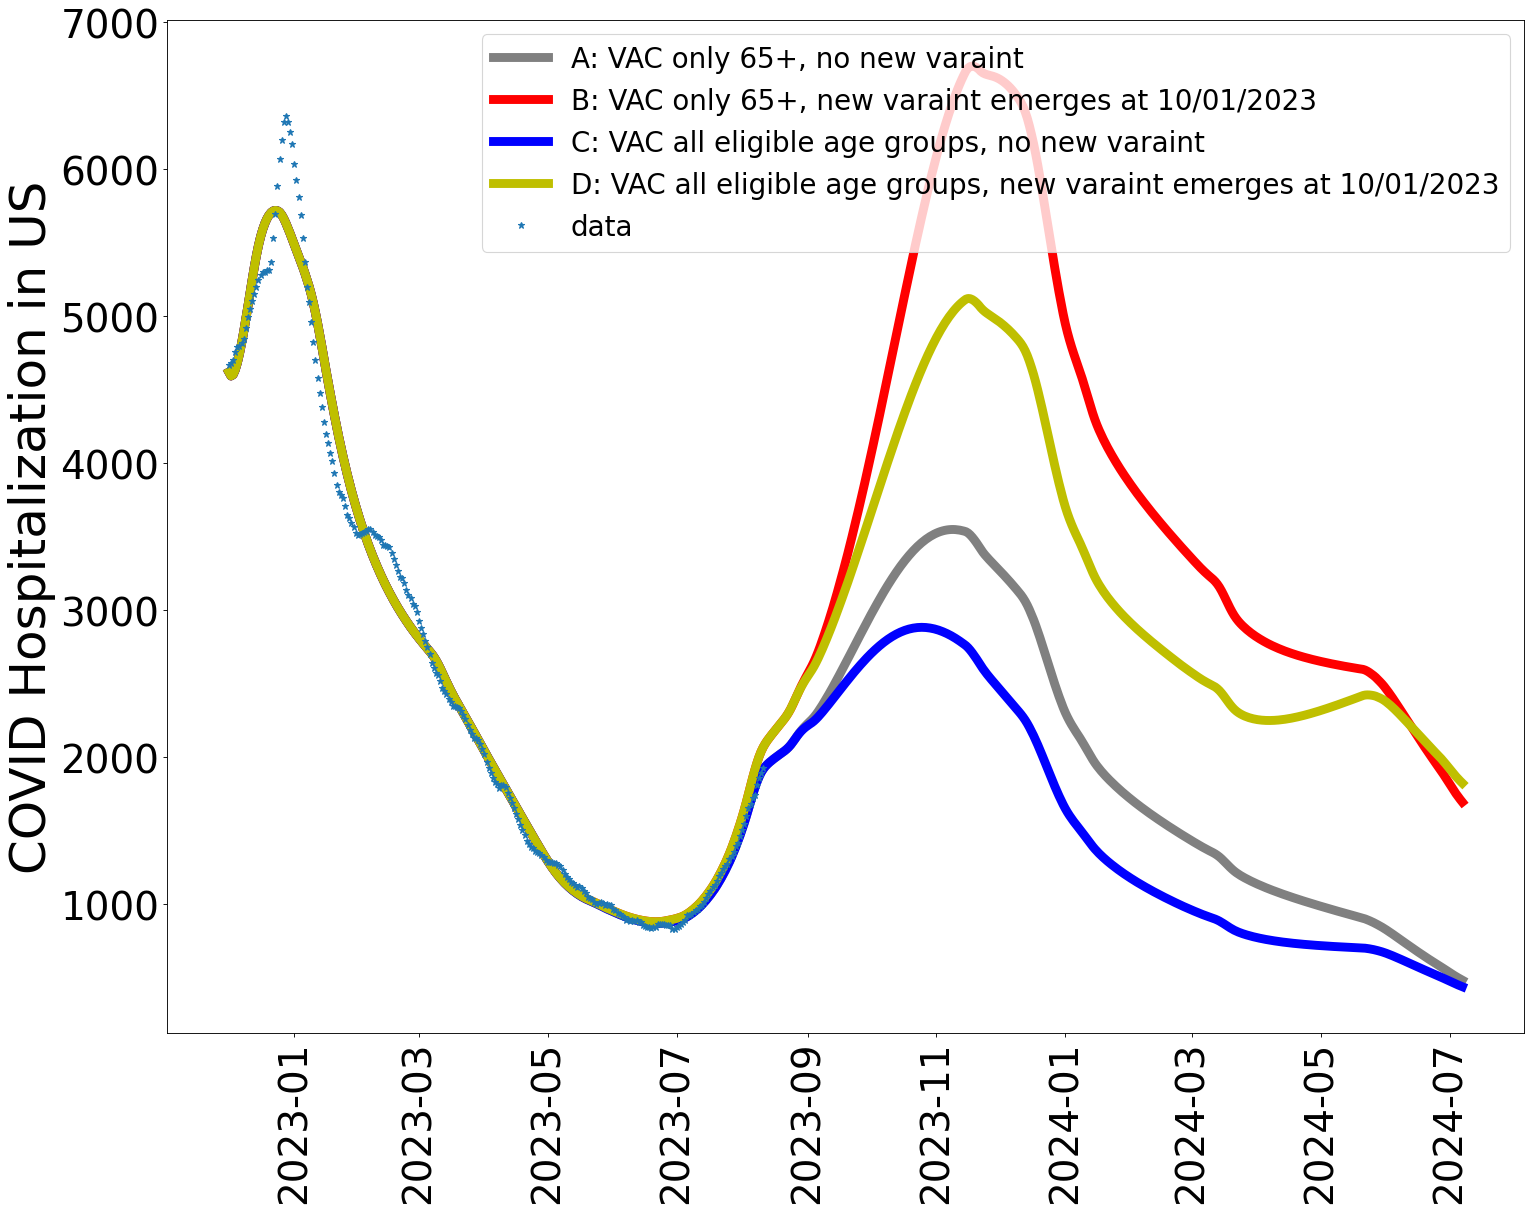

In [58]:
import matplotlib.dates as mdates
drange1 = pd.date_range("2022-12-01", periods=585, freq="1D")
drange2 = pd.date_range("2022-12-01", periods=254, freq="1D")
fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})

_=plt.xticks(rotation=90)  


plt.plot(drange1, H_ov_avg_a, 'gray', label = 'A: VAC only 65+, no new varaint', lw =8)
plt.plot(drange1, H_ov_avg_b, 'r', label = 'B: VAC only 65+, new varaint emerges at 10/01/2023', lw =8)
plt.plot(drange1, H_ov_avg_c, 'b', label = 'C: VAC all eligible age groups, no new varaint', lw =8)
plt.plot(drange1, H_ov_avg_d, 'y', label = 'D: VAC all eligible age groups, new varaint emerges at 10/01/2023', lw =8)



plt.plot(drange2, hosp_avg, '*', label = 'data', lw =30)

plt.ylabel('COVID Hospitalization in ' + state, fontsize = 45)

plt.legend(fontsize = 25)
plt.tight_layout()


In [59]:
import datetime
import pandas as pd


start_date = datetime.date(2022, 12, 1)
delta = datetime.timedelta(days=1)
FL_D = pd.DataFrame(columns=['date_count', 'COVID_scenario_A', 'COVID_scenario_B', 'COVID_scenario_C', 'COVID_scenario_D'])

for i in range(585):
    start_date += delta
    date = start_date
    SA = H_ov_avg_a[i]
    SB = H_ov_avg_b[i]
    SC = H_ov_avg_c[i]
    SD = H_ov_avg_d[i]
    
    FL_D = FL_D.append({'date_count': start_date, 'COVID_scenario_A': SA, 'COVID_scenario_B': SB,
                        'COVID_scenario_C': SC, 'COVID_scenario_D': SD}, ignore_index=True)
FL_D  

,date_count,COVID_scenario_A,COVID_scenario_B,COVID_scenario_C,COVID_scenario_D
0,2022-12-02,4619.471289,4619.471289,4619.471289,4619.471289
1,2022-12-03,4593.476734,4593.476734,4593.476734,4593.476734
2,2022-12-04,4602.477831,4602.477831,4602.477831,4602.477831
3,2022-12-05,4634.548328,4634.548328,4634.548328,4634.548328
4,2022-12-06,4683.114533,4683.114533,4683.114533,4683.114533
...,...,...,...,...,...
580,2024-07-04,517.903114,1773.644255,464.126263,1886.096436
581,2024-07-05,509.062646,1752.520634,457.709210,1869.326233
582,2024-07-06,500.580971,1732.578200,451.548616,1853.607847
583,2024-07-07,492.410645,1713.614205,445.607650,1838.755172


In [51]:
FL_D.to_csv('COVID_projection_results.csv')

In [61]:
np.savetxt('fit_param/'+state+'/popt.csv', popt, delimiter=',')
np.savetxt('fit_param/'+state+'/popt3.csv', popt3, delimiter=',')


In [62]:
aaaa=popt[0:5]/N
aaaa1=np.std(aaaa)
aaaa1

0.010535174378389472

In [63]:
bbbb=(np.sqrt(np.diag(pcov)/(N*N)))            
bbbb

array([1.15593019e-03, 3.66175954e-04, 2.78740634e-04, 4.91411277e-04,
       8.09902375e-04, 1.62847445e-03, 6.76195306e-04, 5.51117939e-05,
       8.26074632e-05])

In [64]:
def tau_cal(x):
    x=int(x)
    if (x>=0):
        tau_leap=int(np.random.poisson(x, 1))
    else:
        tau_leap=int(np.random.poisson(x*(-1), 1))*(-1)
    return tau_leap

In [65]:
def simulation_st2(x, popt, popt3, param, sc1,seed_list):
    x0, x01, x02, x03, x04, x05, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6], popt[7],  popt[8]
    z0, z1, z2, z3, z4, z5, z6 = popt3[0], popt3[1], popt3[2], popt3[3], popt3[4], popt3[5], popt3[6]
    k1, k2, k3, cof_b, cof_y, cof_z = param[0], param[1], param[2], param[3], param[4], param[5]
    
    Nd = 871
    dt = 1  #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    Ia = np.zeros([6, ])
    Is = np.zeros([6, ])
    Pa = np.zeros([6, ])
    Ps = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    D = np.zeros([6, ])
    M4 = M4_0 #BA45
    MBQ=MBQ_0 #MBQ
    MXBB=MXBB_0
    MXnew=MXnew_0
    Mrb=Mref1_0
    Mrb2=Mref2_0
    Mrb3=Mref3_0

    Mh4 = M4_0 #BA45
    MhBQ=MBQ_0 #MBQ
    MhXBB=MXBB_0
    MhXnew=MXnew_0
    Mhrb=Mref1_0
    Mhrb2=Mref2_0
    Mhrb3=Mref3_0
    ICU = np.zeros([6, ])

    

    sigma = 0.000  #0.005
    
    #np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    

    KK1_1 = 3
    KK2_1 = 5.66
    KK3_1 = 12.33
    KK1_2 = 1.3333
    KK2_2 = 5.66
    KK3_2 = 12.33

            
    Kex = 0.25
    Kex2 = 0.35      
    Kex3 = 0.30
    Kex4 = 0.35
 

    K1_1 = 8
    K2_1 = 5.66
    K3_1 = 12.33
    K1_2 = 8
    K2_2 = 5.66
    K3_2 = 12.33
              
    
    KKK1_1 = 19
    KKK2_1 = 5.66
    KKK3_1 = 12.33   
    KKK1_2 = 19
    KKK2_2 = 5.66
    KKK3_2 = 12.33 
   
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    Ia_new = np.zeros([6, ])
    Is_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    Pa_new = np.zeros([6, ])
    Ps_new = np.zeros([6, ])    
    D_age = np.zeros([6, ])

    M4_new = np.zeros([6, ])
    MBQ_new = np.zeros([6, ])
    MXBB_new = np.zeros([6, ])
    MXnew_new = np.zeros([6, ])
    Mrb_new = np.zeros([6, ])
    Mrb2_new = np.zeros([6, ])
    Mrb3_new = np.zeros([6, ])
    
    M4_rec = np.zeros([6, Nd])
    MBQ_rec = np.zeros([6, Nd])
    MXBB_rec = np.zeros([6, Nd])
    MXnew_rec = np.zeros([6, Nd])
    Mh4_rec = np.zeros([6, Nd])
    MhBQ_rec = np.zeros([6, Nd])
    MhXBB_rec = np.zeros([6, Nd])

    ICU_new = np.zeros([6, ])

    Mh4_new = np.zeros([6, ])
    MhBQ_new = np.zeros([6, ])
    MhXBB_new = np.zeros([6, ])
    MhXnew_new = np.zeros([6, ])
    Mhrb_new = np.zeros([6, ])
    Mhrb2_new = np.zeros([6, ])
    Mhrb3_new = np.zeros([6, ])
   
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
  
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    hosp_cc1 = np.zeros([Nd, ])
    hosp_cc2 = np.zeros([Nd, ])
    hosp_cc3 = np.zeros([Nd, ])
    hosp_cc4 = np.zeros([Nd, ])
    hosp_cc5 = np.zeros([Nd, ])
    hosp_cc0 = np.zeros([Nd, ])
    
    
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    
    M4_ovv = np.zeros([Nd, ])
    MBQ_ovv = np.zeros([Nd, ])
    MXBB_ovv = np.zeros([Nd, ])
    MXnew_ovv = np.zeros([Nd, ])
    Mrb_ovv = np.zeros([Nd, ])
    Mrb2_ovv = np.zeros([Nd, ])
    Mrb3_ovv = np.zeros([Nd, ])


    bita_s = np.zeros([Nd, ])    
    count = 0
    a1bar = np.asarray([0.35*g_E for n in range(6)])
    a1 = np.asarray([0.65*g_E for n in range(6)])
    
    
 #waning of protection against hospitalization/death
     
    g_HH = np.zeros([6, ])
    g_dd = np.zeros([6, ])
    a_bar = np.zeros([6, ])
    aa = np.zeros([6, ]) 
    for i in range(6):
        g_HH[i] = y0*0.1*YHR[i]*1*g_inf
        g_dd[i] = z0*IHR[i]*g_hosp                            
        a_bar[i] = 1*a1bar[i]
        aa[i] = 1*a1[i]

    g_hr = np.asarray([0.1*(hosp_data[n,3]/100)*g_hosp for n in range(6)])   
    g_r = g_Recovery    
    g_Ed = 1/2.3
    E0 = [x2 for n in range(6)]
    Ia_0 = [x1 for n in range(6)]
    Is_0 = [x3 for n in range(6)]
    H0 = [y6/6 for n in range(6)]
    
    w11 = 1/(3*30) # waning time for rb, rb2, rb3
    w3 = 1/(8*30) # waning for BA45, BQ, XBB
    ww = 1/(1*30) # exit rate for R
    wxw = 0/(3*30) # waning for ref to hosp immunity
    www = 0/(8*30) # waning for previous inf to hosp immunity

    D0 = [760/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - Ia_0[n] - Is_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    Ia = np.asarray(Ia_0); Is = np.asarray(Is_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); 
    for tt in range(int(Nd/dt)):
        seed_index=int(seed_list[count])
        np.random.seed(seed_index)
        prev4=prev_lvl_45[count]-prev_lvl_BQ[count]
        prevBQ=prev_lvl_BQ[count]- prev_lvl_XBB[count]
        if (sc1 == 'A' or sc1 == 'C'):
            prevXBB=prev_lvl_XBB[count]
            prevNEW=0
            
        if (sc1 == 'B' or sc1 == 'D'):   
            prevXBB=prev_lvl_XBB[count]*(1-prev_lvl_new[count])
            prevNEW=prev_lvl_new[count]
        
   
        if (tt*dt < 51):
            bita = (x0 + (tt*dt)*(x01 - x0)/51)/N
            zx = z0 + tt*dt*(z1 - z0)/51

        if (tt*dt >= 51 and tt*dt < 102):
            bita = (x01 + (tt*dt - 51)*(x02 - x01)/51)/N
            zx = z1 + (tt*dt-51)*(z2 - z1)/51


        if (tt*dt >= 102 and tt*dt < 153):
            #sigma = 0.000
            bita = (x02 + (tt*dt - 102)*(x03 - x02)/51)/N
            zx = z2 + (tt*dt-102)*(z3 - z2)/51

        if (tt*dt >= 153 and tt*dt < 204):
            bita = (x03 + (tt*dt - 153)*(x04 - x03)/51)/N
            zx = z3 + (tt*dt-153)*(z4 - z3)/51
          
        
        if (tt*dt >= 204 and tt*dt < 254):
            sigma = 0.000
            bita = (x04 + (tt*dt - 204)*(x05 - x04)/50)/N
            zx = z4 + (tt*dt-204)*(z5 - z4)/50
    
            
          
        if (tt*dt >= 254):
            aaaa=popt[0:5]         
            std=np.std(aaaa)
            rnd=np.random.normal(0, std, 1)
            x6 =(x0+ x01+ x04 + x05)/4
            bita = (x6+rnd)/N            
            zx = z5

            
        CM = CM_all
        if (count <= 871):
            if (school[count] == 0):                
                CM = CM - CM_s
            if (work[count] == 0):
                CM = CM_all-CM_w-CM_s

        
        yx=1
        zx = zx

        for i in range(6):
            g_HH[i] = yx*0.1*YHR[i]*1*g_inf
            g_dd[i] = zx*IHR[i]*g_hosp 
            
        S_g  =  g(S[i],sigma)*dW(dt)
        E_g  =  g(E[i],sigma)*dW(dt)
        Ps_g  =  g(Pa[i],sigma)*dW(dt)
        Pa_g = g(Pa[i],sigma)*dW(dt)
        Is_g  =  g(Is[i],sigma)*dW(dt)
        Ia_g = g(Ia[i],sigma)*dW(dt)
        H_g = g(H[i],sigma)*dW(dt)              
        R_g = g(R[i],sigma)*dW(dt)           

       
        K1_inf = [4, 4, 4, 4, 4, 4]  # efficancy for infection based immunity
        K2_inf = [19, 19, 19, 19, 19, 19]
        K3_inf = [38, 38, 38, 38, 38, 38]        
        Ks_inf = 0.05
        
        
        K1_ref = [1.8571, 1.8571, 1.8571, 1.8571, 1.8571, 1.8571]   # efficancy for ref booster
        #K1_v = [0, 0, 0, 0, 0, 0]
        K2_ref = [18, 18, 18, 19, 18, 18]
        K3_ref = [38, 38, 38, 38, 38, 38]
        Ks_ref = 0.05
        
        
        


        for i in range(6):
            if (count <254):
                prot_symp = Ks_ref*Mrb[i]*g_E*(1-prevNEW*0.5)+Ks_ref*Mrb2[i]*g_E+Ks_ref*Mrb3[i]*g_E+Ks_inf*(M4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)*g_E+Ks_inf*(MBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)*g_E+Ks_inf*(MXBB[i])*(1-0.5*prevNEW)*g_E+Ks_inf*(MXnew[i])*g_E
                aa[i] = min(a1[i] + prot_symp, 1*g_E)
                a_bar[i] = max(a1bar[i] - prot_symp, 0)

                prot_inf=K1_ref[i]*Mrb[i]*(1-prevNEW*0.5)+K1_ref[i]*Mrb2[i]+K1_ref[i]*Mrb3[i]+K1_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K1_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K1_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K1_inf[i]*(MhXnew[i])
                prot_hos =K2_ref[i]*Mhrb[i]*(1-prevNEW*0.5)+K2_ref[i]*Mhrb2[i]+K2_ref[i]*Mhrb3[i]+K2_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K2_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K2_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K2_inf[i]*(MhXnew[i])
                prot_dea =K3_ref[i]*Mhrb[i]*(1-prevNEW*0.5)+K3_ref[i]*Mhrb2[i]+K3_ref[i]*Mhrb3[i]+K3_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K3_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K3_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K3_inf[i]*(MhXnew[i])

                S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + ww*R[i])
                E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - g_E*E[i])
                Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i]) 
                Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i]) 
                case_c_new[i] = case_c[i] + dt*(g_Ed*Ps[i])      
                Ia_new[i] = Ia[i] + dt*(g_Ed*Pa[i] - g_r*Ia[i])
                Is_new[i] = Is[i] + dt*(g_Ed*Ps[i]  - (g_HH[i]/(1 + prot_hos))*Is[i] - g_em*Is[i])
                hosp_c_new[i] = hosp_c[i] + dt*((g_HH[i]/( 1+ prot_hos))*Is[i]) 
                H_new[i] = H[i] + dt*((g_HH[i]/(1+ prot_hos))*Is[i]  - (g_dd[i]/(1 + prot_dea))*H[i] - g_hr[i]*H[i])   
                D_new[i] = D[i] + dt*(g_dd[i]*H[i]/(1+ prot_dea)) 
                R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i])


            if (count >=254):
                prot_symp = Ks_ref*Mrb[i]*g_E*(1-prevNEW*0.5)+Ks_ref*Mrb2[i]*g_E+Ks_ref*Mrb3[i]*g_E+Ks_inf*(M4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)*g_E+Ks_inf*(MBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)*g_E+Ks_inf*(MXBB[i])*(1-0.5*prevNEW)*g_E+Ks_inf*(MXnew[i])*g_E
                aa[i] = min(a1[i] + prot_symp, 1*g_E)
                a_bar[i] = max(a1bar[i] - prot_symp, 0)

                prot_inf=K1_ref[i]*Mrb[i]*(1-prevNEW*0.5)+K1_ref[i]*Mrb2[i]+K1_ref[i]*Mrb3[i]+K1_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K1_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K1_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K1_inf[i]*(MhXnew[i])
                prot_hos =K2_ref[i]*Mhrb[i]*(1-prevNEW*0.5)+K2_ref[i]*Mhrb2[i]+K2_ref[i]*Mhrb3[i]+K2_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K2_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K2_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K2_inf[i]*(MhXnew[i])
                prot_dea =K3_ref[i]*Mhrb[i]*(1-prevNEW*0.5)+K3_ref[i]*Mhrb2[i]+K3_ref[i]*Mhrb3[i]+K3_inf[i]*(Mh4[i])*(1-0.2*prevBQ)*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K3_inf[i]*(MhBQ[i])*(1-0.4*prevXBB)*(1-0.5*prevNEW)+K3_inf[i]*(MhXBB[i])*(1-0.5*prevNEW)+K3_inf[i]*(MhXnew[i])

                S_new[i] = S[i] + dt*tau_cal(-(bita/(1 + prot_inf))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i]) + tau_cal(ww*R[i])
                E_new[i] = E[i] + dt*tau_cal((bita/(1 + prot_inf))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i]) - tau_cal(g_E*E[i])
                Pa_new[i] = Pa[i] + dt*tau_cal(aa[i]*E[i]) - tau_cal(g_Ed*Pa[i]) 
                Ps_new[i] = Ps[i] + dt*tau_cal(a_bar[i]*E[i])  - tau_cal(g_Ed*Ps[i]) 
                case_c_new[i] = case_c[i] + dt*tau_cal(g_Ed*Ps[i])      
                Ia_new[i] = Ia[i] + dt*tau_cal(g_Ed*Pa[i]) - tau_cal(g_r*Ia[i])
                Is_new[i] = Is[i] + dt*tau_cal(g_Ed*Ps[i])  - tau_cal((g_HH[i]/(1 + prot_hos))*Is[i]) - tau_cal(g_em*Is[i])
                hosp_c_new[i] = hosp_c[i] + dt*tau_cal((g_HH[i]/( 1+ prot_hos))*Is[i]) 
                H_new[i] = H[i] + dt*tau_cal((g_HH[i]/(1+ prot_hos))*Is[i])  - tau_cal((g_dd[i]/(1 + prot_dea))*H[i]) - tau_cal(g_hr[i]*H[i])   
                D_new[i] = D[i] + dt*tau_cal(g_dd[i]*H[i]/(1+ prot_dea)) 
                R_new[i] = R[i] + dt*tau_cal(g_hr[i]*H[i]) + tau_cal(g_r*Ia[i]) + tau_cal(g_em*Is[i]) - tau_cal(ww*R[i])


            if (count <= Nd):

                if (sc1 == 'A' or sc1 ==  'B'):
                    vacc_ref = vacc_ref1
                    vacc_ref2 = vacc_ref2_CD
                    vacc_ref3 = vacc_ref3_CD
                elif (sc1 == 'C' or sc1 == 'D'):
                    vacc_ref = vacc_ref1
                    vacc_ref2 = vacc_ref2_EF
                    vacc_ref3 = vacc_ref3_EF

               
                Mrb_new[i] = min(max(Mrb[i] + dt*(- w11*Mrb[i] + k2*vacc_ref[i, count]),0),1) 
                Mrb2_new[i] = min(max(Mrb2[i] + dt*(- w11*Mrb2[i] + k2*vacc_ref2[i, count]),0),1)
                Mrb3_new[i] = min(max(Mrb3[i] + dt*(- w11*Mrb3[i] + k2*vacc_ref3[i, count]),0),1)


                M4_new[i] = min(max(M4[i] + dt*(k3*prev4*R[i]/(1 + KM*prot_hos) - w3*M4[i]),0),1)

                MBQ_new[i] = min(max(MBQ[i] + dt*(k3*prevBQ*R[i]/(1 + KM*prot_hos) - w3*MBQ[i]),0),1)

                MXBB_new[i] = min(max(MXBB[i] + dt*(k3*prevXBB*R[i]/(1 + KM*prot_hos) - w3*MXBB[i]),0),1)
                
                MXnew_new[i] = min(max(MXnew[i] + dt*(k3*prevNEW*R[i]/(1 + KM*prot_hos) - w3*MXnew[i]),0),1)



                Mhrb_new[i] = min(max(Mhrb[i] + dt*(- wxw*Mhrb[i] + k2*vacc_ref[i, count]),0),1) 
                Mhrb2_new[i] = min(max(Mhrb2[i] + dt*(- wxw*Mhrb2[i] + k2*vacc_ref2[i, count]),0),1)
                Mhrb3_new[i] = min(max(Mhrb3[i] + dt*(- wxw*Mhrb3[i] + k2*vacc_ref3[i, count]),0),1)

                Mh4_new[i] = min(max(Mh4[i] + dt*(k3*prev4*R[i]/(1 + KM*prot_hos) - www*Mh4[i]),0),1)

                MhBQ_new[i] = min(max(MhBQ[i] + dt*(k3*prevBQ*R[i]/(1 + KM*prot_hos) - www*MhBQ[i]),0),1)

                MhXBB_new[i] = min(max(MhXBB[i] + dt*(k3*prevXBB*R[i]/(1 + KM*prot_hos) - www*MhXBB[i]),0),1)
                
                MhXnew_new[i] = min(max(MhXnew[i] + dt*(k3*prevNEW*R[i]/(1 + KM*prot_hos) - w3*MhXnew[i]),0),1)

                M4_rec[i,count] = M4_new[i]
                MBQ_rec[i,count] = MBQ_new[i]
                MXBB_rec[i,count] = MXBB_new[i]
                MXnew_rec[i,count] = MXnew_new[i]
                Mh4_rec[i,count] = Mh4_new[i]
                MhBQ_rec[i,count] = MhBQ_new[i]
                MhXBB_rec[i,count] = MhXBB_new[i]

                            
        S = S_new; E = E_new; Ia = Ia_new; Is = Is_new; case_c = case_c_new; hosp_c = hosp_c_new; Ps = Ps_new; Pa = Pa_new; 
        M4 = M4_new; MBQ = MBQ_new; MXBB = MXBB_new; MXnew = MXnew_new;
        Mh4 = Mh4_new; MhBQ = MhBQ_new; MhXBB = MhXBB_new;MhXnew = MhXnew_new;
        Mrb = Mrb_new; Mhrb = Mhrb_new; 
        Mrb2 = Mrb2_new; Mhrb2 = Mhrb2_new; 
        Mrb3 = Mrb3_new; Mhrb3 = Mhrb3_new; H = H_new; D = D_new; R = R_new;
        
        if(tt % int(1/dt) == 0):
            bita_s[count] = bita
            
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            hosp_cc0[count] = hosp_c[0]
            hosp_cc1[count] = hosp_c[1]
            hosp_cc2[count] = hosp_c[2]
            hosp_cc3[count] = hosp_c[3]
            hosp_cc4[count] = hosp_c[4]
            hosp_cc5[count] = hosp_c[5]

            M4_ovv[count] = np.sum(np.array(data_dem)*np.array(M4))/N
            MBQ_ovv[count] = np.sum(np.array(data_dem)*np.array(MBQ))/N
            MXBB_ovv[count] = np.sum(np.array(data_dem)*np.array(MXBB))/N
            MXnew_ovv[count] = np.sum(np.array(data_dem)*np.array(MXnew))/N
            Mrb_ovv[count] = np.sum(np.array(data_dem)*np.array(Mrb))/N
            Mrb2_ovv[count] = np.sum(np.array(data_dem)*np.array(Mrb2))/N
            Mrb3_ovv[count] = np.sum(np.array(data_dem)*np.array(Mrb3))/N
            
            
            Ia_ov[count] = np.sum(Ia)
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(Is + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(ICU)
            count = count+1
                          
    D_age = np.sum(D)   
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg0 = np.zeros([Nd-7, ])
    H_ov_avg1 = np.zeros([Nd-7, ])
    H_ov_avg2 = np.zeros([Nd-7, ])
    H_ov_avg3 = np.zeros([Nd-7, ])
    H_ov_avg4 = np.zeros([Nd-7, ])
    H_ov_avg5 = np.zeros([Nd-7, ])
    H_ova0 = cum_to_active(hosp_cc0)
    H_ova1 = cum_to_active(hosp_cc1)
    H_ova2 = cum_to_active(hosp_cc2)
    H_ova3 = cum_to_active(hosp_cc3)
    H_ova4 = cum_to_active(hosp_cc4)
    H_ova5 = cum_to_active(hosp_cc5)
    
    for i in range(Nd-7):
        
        I_ov_avg[i] = np.mean(D2_ova[i:i+7])
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
        H_ov_avg0[i] = max(np.mean(H_ova0[i:i+7]), 0)
        H_ov_avg1[i] = max(np.mean(H_ova1[i:i+7]), 0)
        H_ov_avg2[i] = max(np.mean(H_ova2[i:i+7]), 0)
        H_ov_avg3[i] = max(np.mean(H_ova3[i:i+7]), 0)
        H_ov_avg4[i] = max(np.mean(H_ova4[i:i+7]), 0)
        H_ov_avg5[i] = max(np.mean(H_ova5[i:i+7]), 0)
        
    peak_d_D = 0
    peak_d_H = 0
    peak_d_I = 0
        
    peak_I = I_ov_avg[34]
    peak_H = H_ov_avg[34]
    peak_D = D_ov_avg[34]

    for i in range(88,100):
        if (I_ov_avg[i] <= 150000):
            peak_d_I = i
        if (H_ov_avg[i] <= 50000):
            peak_d_H = i   
        if (D_ov_avg[i] <= 1000):
            peak_d_D = i
       
    return I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, peak_I, peak_H, peak_D, peak_d_I, peak_d_H, peak_d_D, bita_s, R_ov, M4_ovv, MBQ_ovv,MXBB_ovv,Mrb_ovv,Mrb2_ovv,Mrb3_ovv, M4_rec,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5

In [66]:
from numpy import genfromtxt
seed_table= genfromtxt('seed.csv', delimiter=',')

In [67]:
def sim_scenario(sc1, param_0):
    Nsim = 200

    popt = np.loadtxt('fit_param/'+state+'/popt.csv', delimiter=',')
    popt3 = np.loadtxt('fit_param/'+state+'/popt3.csv', delimiter=',')

        
        
    param = param_0
    new_hosp = np.zeros([864, Nsim])
    new_death = np.zeros([864, Nsim])
    
    new_hosp_0 = np.zeros([864, Nsim])
    new_hosp_1 = np.zeros([864, Nsim])
    new_hosp_2 = np.zeros([864, Nsim])
    new_hosp_3 = np.zeros([864, Nsim])
    new_hosp_4 = np.zeros([864, Nsim])
    new_hosp_5 = np.zeros([864, Nsim])
    seed_list = np.zeros([1000, 1])
    
    for i in range(Nsim):
        seed_list= seed_table[i,:]
        I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, peak_I, peak_H, peak_D, peak_d_I, peak_d_H, peak_d_D, bita_s, R_ov, M4_ovv, MBQ_ovv,MXBB_ovv,Mrb_ovv,Mrb2_ovv,Mrb3_ovv, M4_rec,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5 = simulation_st2(0, popt, popt3, param, sc1,seed_list)
        new_hosp[:,i] = H_ov_avg
        new_death[:,i] = D_ov_avg

        new_hosp_0[:,i] = H_ov_avg0
        new_hosp_1[:,i] = H_ov_avg1
        new_hosp_2[:,i] = H_ov_avg2
        new_hosp_3[:,i] = H_ov_avg3
        new_hosp_4[:,i] = H_ov_avg4
        new_hosp_5[:,i] = H_ov_avg5
        
    print("computing percentiles for, ", sc1)
    #new_case_p = np.zeros([864, 25])
    new_hosp_p = np.zeros([864, 25])
    new_death_p = np.zeros([864, 25])
    new_hosp_p0 = np.zeros([864, 25])
    new_hosp_p1 = np.zeros([864, 25]) 
    new_hosp_p2 = np.zeros([864, 25])
    new_hosp_p3 = np.zeros([864, 25])
    new_hosp_p4 = np.zeros([864, 25])
    new_hosp_p5 = np.zeros([864, 25])
    
    
    for i in range(864):
        new_hosp_p[i,:] = np.percentile(new_hosp[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_death_p[i,:] = np.percentile(new_death[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p0[i,:] = np.percentile(new_hosp_0[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p1[i,:] = np.percentile(new_hosp_1[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p2[i,:] = np.percentile(new_hosp_2[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p3[i,:] = np.percentile(new_hosp_3[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p4[i,:] = np.percentile(new_hosp_4[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p5[i,:] = np.percentile(new_hosp_5[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])

    
    return new_hosp_p, new_death_p, new_hosp_p0, new_hosp_p1, new_hosp_p2, new_hosp_p3, new_hosp_p4, new_hosp_p5

In [68]:
param = [k1, k2, k3, cof_b, cof_y, cof_z]

In [69]:
 new_hosp_p_A, new_death_p_A, new_hosp_p0_A, new_hosp_p1_A, new_hosp_p2_A, new_hosp_p3_A, new_hosp_p4_A, new_hosp_p5_A= sim_scenario('A', param)

computing percentiles for,  A


In [70]:
 new_hosp_p_B, new_death_p_B, new_hosp_p0_B, new_hosp_p1_B, new_hosp_p2_B, new_hosp_p3_B, new_hosp_p4_B, new_hosp_p5_B = sim_scenario('B', param)

computing percentiles for,  B


In [71]:
 new_hosp_p_C, new_death_p_C, new_hosp_p0_C, new_hosp_p1_C, new_hosp_p2_C, new_hosp_p3_C, new_hosp_p4_C, new_hosp_p5_C = sim_scenario('C', param)

computing percentiles for,  C


In [72]:
 new_hosp_p_D, new_death_p_D, new_hosp_p0_D, new_hosp_p1_D, new_hosp_p2_D, new_hosp_p3_D, new_hosp_p4_D, new_hosp_p5_D = sim_scenario('D', param)

computing percentiles for,  D


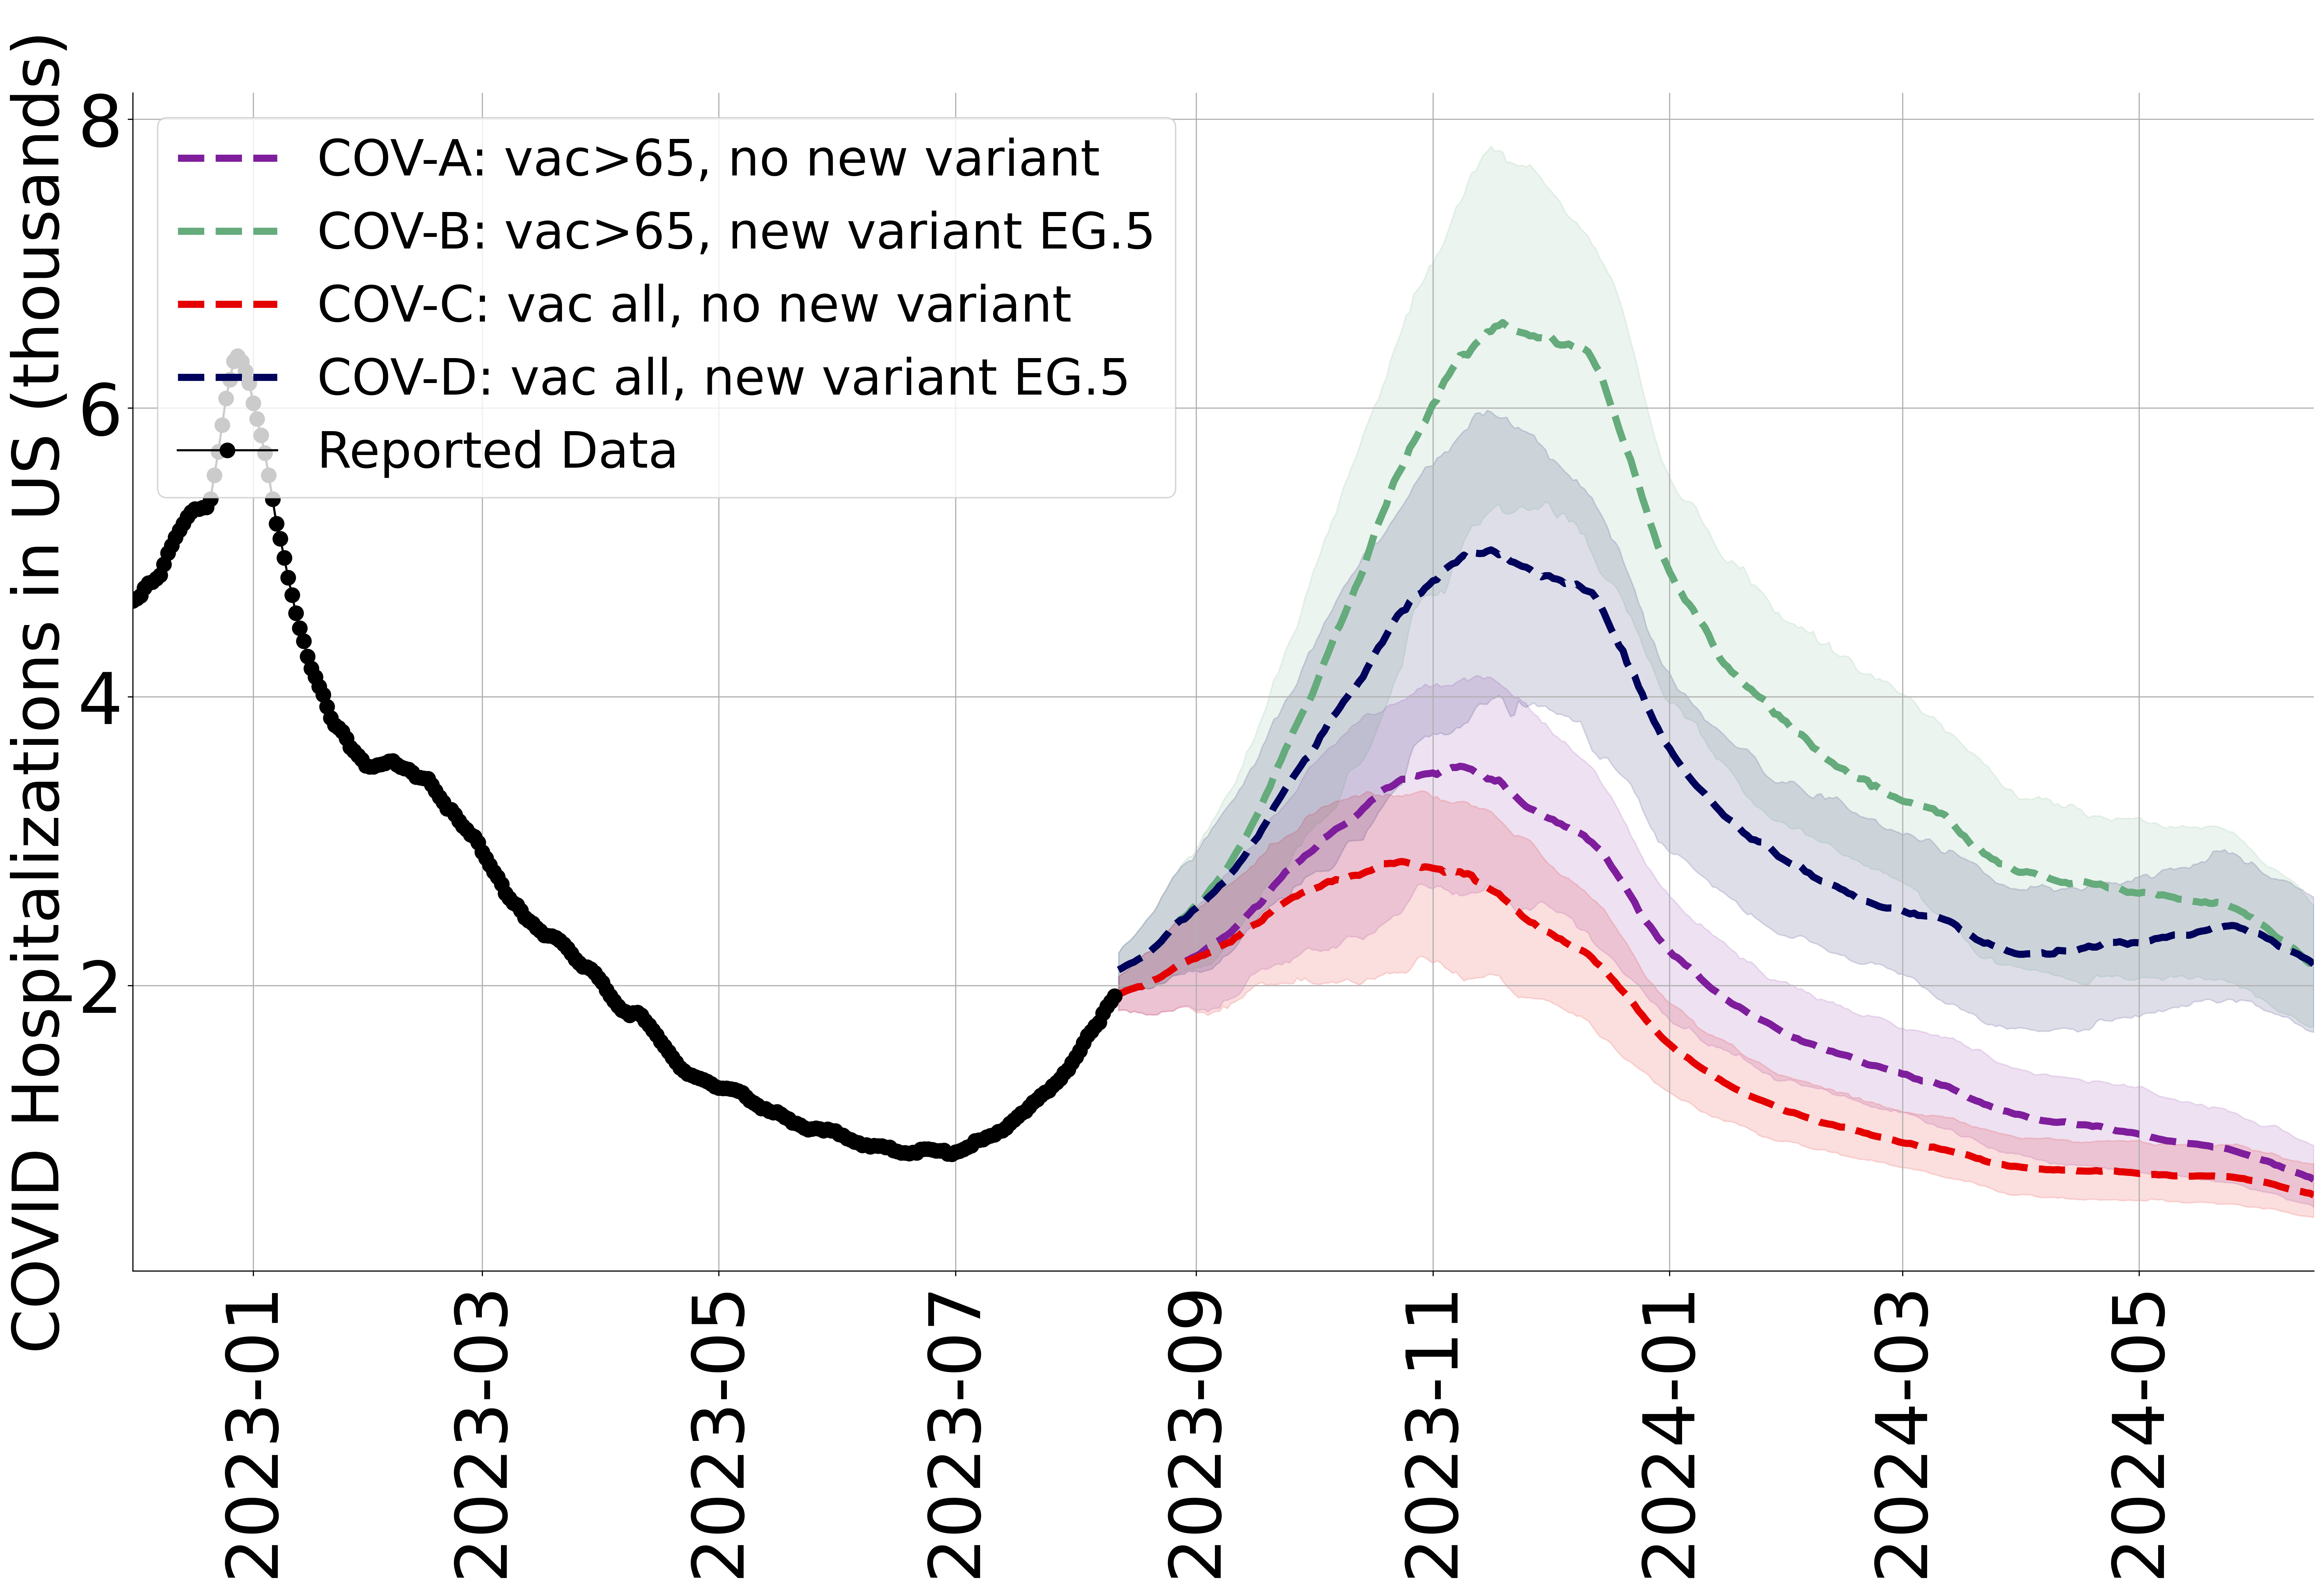

In [73]:
drange1 = pd.date_range("2023-08-12", periods=309, freq="1D")
drange2 = pd.date_range("2022-12-01", periods=254, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=300, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

plt.fill_between(drange1, new_hosp_p_A[255:564,2]/1000, new_hosp_p_A[255:564,21]/1000, color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[255:564,12]/1000, '--', color='xkcd:purple', lw=5, label = 'COV-A: vac>65, no new variant')


plt.fill_between(drange1, new_hosp_p_B[255:564,2]/1000, new_hosp_p_B[255:564,21]/1000, color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[255:564,12]/1000, '--', color='xkcd:tea', lw=5, label = 'COV-B: vac>65, new variant EG.5')



plt.fill_between(drange1, new_hosp_p_C[255:564,2]/1000, new_hosp_p_C[255:564,21]/1000, color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[255:564,12]/1000, '--', color='xkcd:red', lw=5, label = 'COV-C: vac all, no new variant')


plt.fill_between(drange1, new_hosp_p_D[255:564,2]/1000, new_hosp_p_D[255:564,21]/1000, color='xkcd:dark blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_D[255:564,12]/1000, '--', color='xkcd:dark blue', lw=5, label = 'COV-D: vac all, new variant EG.5')


plt.plot(drange2, hosp_avg/1000, 'k-o', markersize=10, label = 'Reported Data')

plt.xticks(rotation=90)
plt.ylabel('COVID Hospitalizations in US (thousands) ', fontsize = 45)
plt.legend(fontsize=35,loc='upper left');
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()

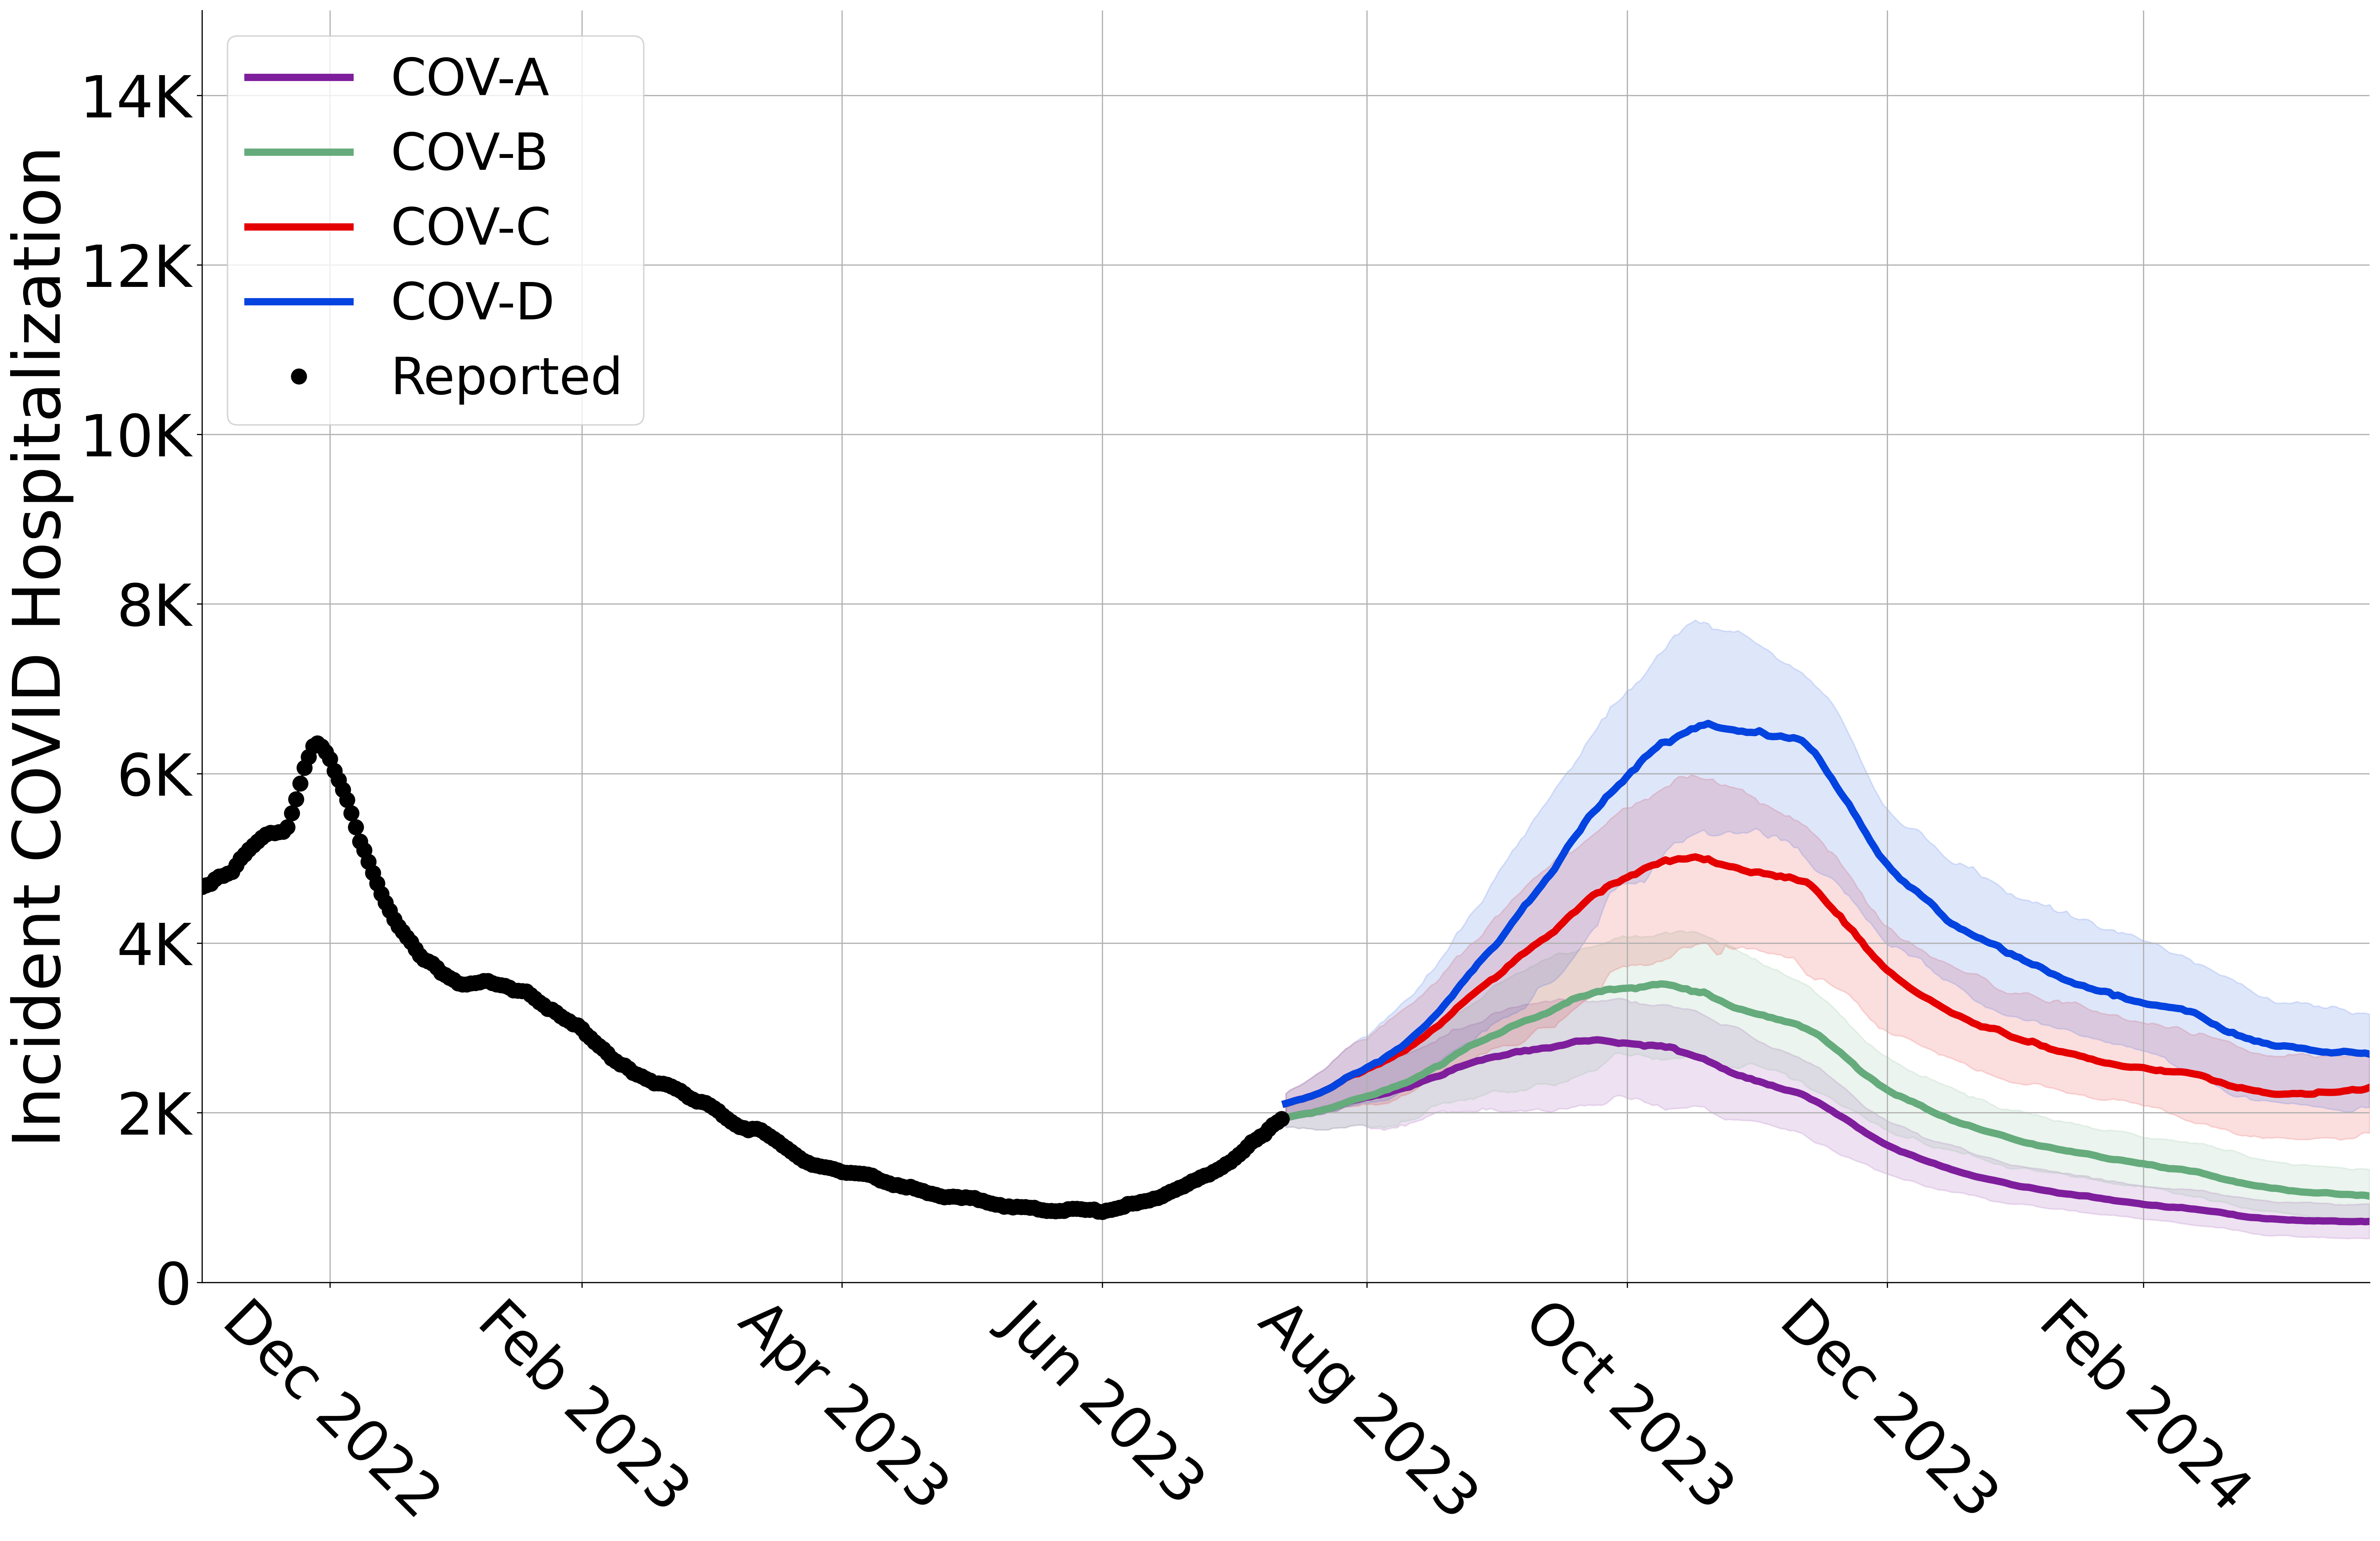

In [99]:
from matplotlib.lines import Line2D
drange1 = pd.date_range("2023-08-12", periods=255, freq="1D")
drange2 = pd.date_range("2022-12-01", periods=254, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=300, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

plt.fill_between(drange1, new_hosp_p_C[255:510,2]/1000, new_hosp_p_C[255:510,21]/1000, color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[255:510,12]/1000, '-', color='xkcd:purple', lw=5, label = 'COV-A')

plt.fill_between(drange1, new_hosp_p_A[255:510,2]/1000, new_hosp_p_A[255:510,21]/1000, color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[255:510,12]/1000, '-', color='xkcd:tea', lw=5, label = 'COV-B')

plt.fill_between(drange1, new_hosp_p_D[255:510,2]/1000, new_hosp_p_D[255:510,21]/1000, color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_D[255:510,12]/1000, '-', color='xkcd:red', lw=5, label = 'COV-C')

plt.fill_between(drange1, new_hosp_p_B[255:510,2]/1000, new_hosp_p_B[255:510,21]/1000, color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[255:510,12]/1000, '-', color='xkcd:blue', lw=5, label = 'COV-D')


plt.plot(drange2, hosp_avg/1000, 'k-o', markersize=10, label = 'Reported Data')

x_ticks = pd.date_range(start="2022-12-01", end="2024-05-03", freq='2M')  # 2-month frequency
x_tick_labels = [x.strftime("%b %Y") for x in x_ticks]

legend_lines = [Line2D([0], [0], color='xkcd:purple', linestyle='-', lw=5),
                Line2D([0], [0], color='xkcd:tea', linestyle='-', lw=5),
                Line2D([0], [0], color='xkcd:red', linestyle='-', lw=5),
                Line2D([0], [0], color='xkcd:blue', linestyle='-', lw=5),
                Line2D([0], [0], marker='o', markersize=10, color='black',linestyle='-', lw=0)]

plt.xticks(x_ticks, x_tick_labels, rotation = -45, fontsize=40)

plt.ylim(0, 15)
#plt.xticks(rotation=90)
plt.ylabel('Incident COVID Hospitalization', fontsize = 45)
plt.legend(fontsize=35,loc='upper left');
plt.autoscale(enable=True, axis='x', tight=True) 
plt.legend(handles=legend_lines,labels=['COV-A','COV-B', 'COV-C', 'COV-D','Reported'], fontsize=35, loc='upper left')
plt.autoscale(enable=True, axis='x', tight=True)
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], ["0",  "2K", "4K", "6K", "8K", "10K", "12K", "14K"],fontsize=40)
plt.tight_layout()

In [82]:
import datetime
def calcul_peak_date(case,lenth,start_t,end_t):
    peaks = np.zeros([lenth,])
    peak_d = np.zeros([lenth,])
    
    my_date = datetime.datetime(2022, 12, 1, 0, 0, 0)
    
    for j in range(lenth):
        peaks[j] = np.max(case[start_t:end_t,j])
        
        for i in range(start_t,end_t):
            if (case[i,j] >= peaks[j]):
                peak_d[j] = i
                
    
    peak_d_p = np.percentile(peak_d, [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
    print(peak_d_p[12])
    
    my_date_50 = my_date + datetime.timedelta(days = peak_d_p[12])
    my_date_50 = my_date_50.strftime('%m/%d')
    
    my_date_5 = my_date + datetime.timedelta(days = peak_d_p[2])
    my_date_5 = my_date_5.strftime('%m/%d')  
    
    my_date_95 = my_date + datetime.timedelta(days = peak_d_p[22])
    my_date_95 = my_date_95.strftime('%m/%d')      
    
    print(str((my_date_50)) + " [" + str((my_date_5)) + ", " + str((my_date_95)) + "]")


In [84]:
calcul_peak_date(new_hosp_p_C,25,255,510)

327.0
10/24 [10/06, 11/01]


In [85]:
calcul_peak_date(new_hosp_p_A,25,255,510)

343.0
11/09 [10/31, 11/27]


In [86]:
calcul_peak_date(new_hosp_p_D,25,255,510)

351.0
11/17 [11/12, 11/29]


In [87]:
calcul_peak_date(new_hosp_p_B,25,255,510)

354.0
11/20 [11/14, 12/07]


In [74]:
import datetime
import pandas as pd

# Define H_ov_avg_a, H_ov_avg_b, H_ov_avg_c, H_ov_avg_d before using them

start_date = datetime.date(2022, 12, 1)
delta = datetime.timedelta(days=1)
FL_D = pd.DataFrame(columns=['date_count', 'COVID_scenario_A','COVID_scenario_A04','COVID_scenario_A511','COVID_scenario_A1218','COVID_scenario_A1949','COVID_scenario_A5064','COVID_scenario_A65',
                             'COVID_scenario_A5','COVID_scenario_A5_04','COVID_scenario_A5_511','COVID_scenario_A5_1218','COVID_scenario_A5_1949','COVID_scenario_A5_5064','COVID_scenario_A5_65',
                             'COVID_scenario_A95','COVID_scenario_A95_04','COVID_scenario_A95_511','COVID_scenario_A95_1218','COVID_scenario_A95_1949','COVID_scenario_A95_5064','COVID_scenario_A95_65',
                             'COVID_scenario_B','COVID_scenario_B04','COVID_scenario_B511','COVID_scenario_B1218','COVID_scenario_B1949','COVID_scenario_B5064','COVID_scenario_B65',
                             'COVID_scenario_B5','COVID_scenario_B5_04','COVID_scenario_B5_511','COVID_scenario_B5_1218','COVID_scenario_B5_1949','COVID_scenario_B5_5064','COVID_scenario_B5_65',
                             'COVID_scenario_B95','COVID_scenario_B95_04','COVID_scenario_B95_511','COVID_scenario_B95_1218','COVID_scenario_B95_1949','COVID_scenario_B95_5064','COVID_scenario_B95_65',
                             'COVID_scenario_C','COVID_scenario_C04','COVID_scenario_C511','COVID_scenario_C1218','COVID_scenario_C1949','COVID_scenario_C5064','COVID_scenario_C65',
                             'COVID_scenario_C5','COVID_scenario_C5_04','COVID_scenario_C5_511','COVID_scenario_C5_1218','COVID_scenario_C5_1949','COVID_scenario_C5_5064','COVID_scenario_C5_65',
                             'COVID_scenario_C95','COVID_scenario_C95_04','COVID_scenario_C95_511','COVID_scenario_C95_1218','COVID_scenario_C95_1949','COVID_scenario_C95_5064','COVID_scenario_C95_65',
                             'COVID_scenario_D','COVID_scenario_D04','COVID_scenario_D511','COVID_scenario_D1218','COVID_scenario_D1949','COVID_scenario_D5064','COVID_scenario_D65',
                             'COVID_scenario_D5','COVID_scenario_D5_04','COVID_scenario_D5_511','COVID_scenario_D5_1218','COVID_scenario_D5_1949','COVID_scenario_D5_5064','COVID_scenario_D5_65',
                             'COVID_scenario_D95','COVID_scenario_D95_04','COVID_scenario_D95_511','COVID_scenario_D95_1218','COVID_scenario_D95_1949','COVID_scenario_D95_5064','COVID_scenario_D95_65'])

for i in range(564):
    start_date += delta
    date = start_date
    SA = new_hosp_p_A[i,12]
    SA_04=new_hosp_p0_A[i,12]
    SA_511=new_hosp_p1_A[i,12]
    SA_1218=new_hosp_p2_A[i,12]
    SA_1949=new_hosp_p3_A[i,12]
    SA_5064=new_hosp_p4_A[i,12]
    SA_65=new_hosp_p5_A[i,12]
    
    SA5 = new_hosp_p_A[i,2]
    SA5_04 = new_hosp_p0_A[i,2]
    SA5_511 = new_hosp_p1_A[i,2]
    SA5_1218 = new_hosp_p2_A[i,2]
    SA5_1949 = new_hosp_p3_A[i,2]
    SA5_5064 = new_hosp_p4_A[i,2]
    SA5_65 = new_hosp_p5_A[i,2]
    
    SA95 = new_hosp_p_A[i,21]
    SA95_04 = new_hosp_p0_A[i,21]
    SA95_511 = new_hosp_p1_A[i,21]
    SA95_1218 = new_hosp_p2_A[i,21]
    SA95_1949 = new_hosp_p3_A[i,21]
    SA95_5064 = new_hosp_p4_A[i,21]
    SA95_65 = new_hosp_p5_A[i,21]
    
    SB = new_hosp_p_B[i,12]
    SB_04=new_hosp_p0_B[i,12]
    SB_511=new_hosp_p1_B[i,12]
    SB_1218=new_hosp_p2_B[i,12]
    SB_1949=new_hosp_p3_B[i,12]
    SB_5064=new_hosp_p4_B[i,12]
    SB_65=new_hosp_p5_B[i,12]
    
    SB5 = new_hosp_p_B[i,2]
    SB5_04 = new_hosp_p0_B[i,2]
    SB5_511 = new_hosp_p1_B[i,2]
    SB5_1218 = new_hosp_p2_B[i,2]
    SB5_1949 = new_hosp_p3_B[i,2]
    SB5_5064 = new_hosp_p4_B[i,2]
    SB5_65 = new_hosp_p5_B[i,2]
    
    SB95 = new_hosp_p_B[i,21]
    SB95_04 = new_hosp_p0_B[i,21]
    SB95_511 = new_hosp_p1_B[i,21]
    SB95_1218 = new_hosp_p2_B[i,21]
    SB95_1949 = new_hosp_p3_B[i,21]
    SB95_5064 = new_hosp_p4_B[i,21]
    SB95_65 = new_hosp_p5_B[i,21]
    
    SC = new_hosp_p_C[i,12]
    SC_04=new_hosp_p0_C[i,12]
    SC_511=new_hosp_p1_C[i,12]
    SC_1218=new_hosp_p2_C[i,12]
    SC_1949=new_hosp_p3_C[i,12]
    SC_5064=new_hosp_p4_C[i,12]
    SC_65=new_hosp_p5_C[i,12]
    
    SC5 = new_hosp_p_C[i,2]
    SC5_04 = new_hosp_p0_C[i,2]
    SC5_511 = new_hosp_p1_C[i,2]
    SC5_1218 = new_hosp_p2_C[i,2]
    SC5_1949 = new_hosp_p3_C[i,2]
    SC5_5064 = new_hosp_p4_C[i,2]
    SC5_65 = new_hosp_p5_C[i,2]
    
    SC95 = new_hosp_p_C[i,21]
    SC95 = new_hosp_p_C[i,21]
    SC95_04 = new_hosp_p0_C[i,21]
    SC95_511 = new_hosp_p1_C[i,21]
    SC95_1218 = new_hosp_p2_C[i,21]
    SC95_1949 = new_hosp_p3_C[i,21]
    SC95_5064 = new_hosp_p4_C[i,21]
    SC95_65 = new_hosp_p5_C[i,21]
    
    SD = new_hosp_p_D[i,12]
    SD_04=new_hosp_p0_D[i,12]
    SD_511=new_hosp_p1_D[i,12]
    SD_1218=new_hosp_p2_D[i,12]
    SD_1949=new_hosp_p3_D[i,12]
    SD_5064=new_hosp_p4_D[i,12]
    SD_65=new_hosp_p5_D[i,12]
    
    SD5 = new_hosp_p_D[i,2]
    SD5_04 = new_hosp_p0_D[i,2]
    SD5_511 = new_hosp_p1_D[i,2]
    SD5_1218 = new_hosp_p2_D[i,2]
    SD5_1949 = new_hosp_p3_D[i,2]
    SD5_5064 = new_hosp_p4_D[i,2]
    SD5_65 = new_hosp_p5_D[i,2]
    
    SD95 = new_hosp_p_D[i,21]
    SD95_04 = new_hosp_p0_D[i,21]
    SD95_511 = new_hosp_p1_D[i,21]
    SD95_1218 = new_hosp_p2_D[i,21]
    SD95_1949 = new_hosp_p3_D[i,21]
    SD95_5064 = new_hosp_p4_D[i,21]
    SD95_65 = new_hosp_p5_D[i,21]
    
    FL_D = FL_D.append({'date_count': start_date,'COVID_scenario_A':SA,'COVID_scenario_A04':SA_04,'COVID_scenario_A511':SA_511,'COVID_scenario_A1218':SA_1218,'COVID_scenario_A1949':SA_1949,'COVID_scenario_A5064':SA_5064,'COVID_scenario_A65':SA_65,
                        'COVID_scenario_A5':SA5,'COVID_scenario_A5_04':SA5_04,'COVID_scenario_A5_511':SA5_511,'COVID_scenario_A5_1218':SA5_1218,'COVID_scenario_A5_1949':SA5_1949,'COVID_scenario_A5_5064':SA5_5064,'COVID_scenario_A5_65':SA5_65,
                        'COVID_scenario_A95':SA95,'COVID_scenario_A95_04':SA95_04,'COVID_scenario_A95_511':SA95_511,'COVID_scenario_A95_1218':SA95_1218,'COVID_scenario_A95_1949':SA95_1949,'COVID_scenario_A95_5064':SA95_5064,'COVID_scenario_A95_65':SA95_65,
                        'COVID_scenario_B':SB,'COVID_scenario_B04':SB_04,'COVID_scenario_B511':SB_511,'COVID_scenario_B1218':SB_1218,'COVID_scenario_B1949':SB_1949,'COVID_scenario_B5064':SB_5064,'COVID_scenario_B65':SB_65,
                        'COVID_scenario_B5':SB5,'COVID_scenario_B5_04':SB5_04,'COVID_scenario_B5_511':SB5_511,'COVID_scenario_B5_1218':SB5_1218,'COVID_scenario_B5_1949':SB5_1949,'COVID_scenario_B5_5064':SB5_5064,'COVID_scenario_B5_65':SB5_65,
                        'COVID_scenario_B95':SB95,'COVID_scenario_B95_04':SB95_04,'COVID_scenario_B95_511':SB95_511,'COVID_scenario_B95_1218':SB95_1218,'COVID_scenario_B95_1949':SB95_1949,'COVID_scenario_B95_5064':SB95_5064,'COVID_scenario_B95_65':SB95_65,
                        'COVID_scenario_C':SC,'COVID_scenario_C04':SC_04,'COVID_scenario_C511':SC_511,'COVID_scenario_C1218':SC_1218,'COVID_scenario_C1949':SC_1949,'COVID_scenario_C5064':SC_5064,'COVID_scenario_C65':SC_65, 
                        'COVID_scenario_C5':SC5,'COVID_scenario_C5_04':SC5_04,'COVID_scenario_C5_511':SC5_511,'COVID_scenario_C5_1218':SC5_1218,'COVID_scenario_C5_1949':SC5_1949,'COVID_scenario_C5_5064':SC5_5064,'COVID_scenario_C5_65':SC5_65,
                        'COVID_scenario_C95':SC95,  'COVID_scenario_C95_04':SC95_04,'COVID_scenario_C95_511':SC95_511,'COVID_scenario_C95_1218':SC95_1218,'COVID_scenario_C95_1949':SC95_1949,'COVID_scenario_C95_5064':SC95_5064,'COVID_scenario_C95_65':SC95_65,
                        'COVID_scenario_D':SD,'COVID_scenario_D04':SD_04,'COVID_scenario_D511':SD_511,'COVID_scenario_D1218':SD_1218,'COVID_scenario_D1949':SD_1949,'COVID_scenario_D5064':SD_5064,'COVID_scenario_D65':SD_65, 
                        'COVID_scenario_D5':SD5,'COVID_scenario_D5_04':SD5_04,'COVID_scenario_D5_511':SD5_511,'COVID_scenario_D5_1218':SD5_1218,'COVID_scenario_D5_1949':SD5_1949,'COVID_scenario_D5_5064':SD5_5064,'COVID_scenario_D5_65':SD5_65,
                        'COVID_scenario_D95':SD95,'COVID_scenario_D95_04':SD95_04,'COVID_scenario_D95_511':SD95_511,'COVID_scenario_D95_1218':SD95_1218,'COVID_scenario_D95_1949':SD95_1949,'COVID_scenario_D95_5064':SD95_5064,'COVID_scenario_D95_65':SD95_65,}, ignore_index=True)
FL_D  

,date_count,COVID_scenario_A,COVID_scenario_A04,COVID_scenario_A511,COVID_scenario_A1218,COVID_scenario_A1949,COVID_scenario_A5064,COVID_scenario_A65,COVID_scenario_A5,COVID_scenario_A5_04,...,COVID_scenario_D5_1949,COVID_scenario_D5_5064,COVID_scenario_D5_65,COVID_scenario_D95,COVID_scenario_D95_04,COVID_scenario_D95_511,COVID_scenario_D95_1218,COVID_scenario_D95_1949,COVID_scenario_D95_5064,COVID_scenario_D95_65
0,2022-12-02,4619.471289,119.567150,31.239222,50.955546,444.780862,925.277351,3047.651159,4619.471289,119.567150,...,444.780862,925.277351,3047.651159,4619.471289,119.567150,31.239222,50.955546,444.780862,925.277351,3047.651159
1,2022-12-03,4593.476734,118.452078,32.043754,49.389732,479.107399,945.228746,2969.255025,4593.476734,118.452078,...,479.107399,945.228746,2969.255025,4593.476734,118.452078,32.043754,49.389732,479.107399,945.228746,2969.255025
2,2022-12-04,4602.477831,118.078283,33.058973,48.129596,517.372051,972.278341,2913.560586,4602.477831,118.078283,...,517.372051,972.278341,2913.560586,4602.477831,118.078283,33.058973,48.129596,517.372051,972.278341,2913.560586
3,2022-12-05,4634.548328,118.183983,34.181364,47.082091,557.311249,1003.273612,2874.516028,4634.548328,118.183983,...,557.311249,1003.273612,2874.516028,4634.548328,118.183983,34.181364,47.082091,557.311249,1003.273612,2874.516028
4,2022-12-06,4683.114533,118.604600,35.356900,46.190361,598.049390,1036.731577,2848.181705,4683.114533,118.604600,...,598.049390,1036.731577,2848.181705,4683.114533,118.604600,35.356900,46.190361,598.049390,1036.731577,2848.181705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,2024-06-13,701.428571,10.285714,4.000000,10.000000,135.928571,210.785714,326.285714,499.853571,6.703571,...,284.714286,424.960714,946.232143,2674.014286,45.571429,18.571429,40.142857,440.350000,649.835714,1488.500000
560,2024-06-14,692.285714,9.714286,3.857143,9.714286,135.428571,208.285714,323.571429,494.432143,6.703571,...,284.478571,423.060714,936.839286,2664.878571,44.171429,17.721429,39.728571,439.457143,644.042857,1483.442857
561,2024-06-15,679.428571,9.857143,3.785714,9.428571,133.928571,205.142857,321.285714,489.739286,6.571429,...,284.203571,418.417857,930.621429,2641.535714,44.292857,17.721429,39.007143,436.600000,634.557143,1469.414286
562,2024-06-16,673.285714,9.428571,3.714286,9.000000,131.571429,201.785714,317.142857,485.100000,6.425000,...,282.607143,410.146429,930.900000,2629.100000,43.864286,16.857143,38.300000,436.335714,631.014286,1458.571429


In [75]:
FL_D.to_csv('Covid_rsv_final_results_new.csv')